In [1]:
!pip install pandas seaborn scikit-learn

In [2]:
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline


In [3]:
pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

In [4]:
!curl -O http://github-images.s3.amazonaws.com/open-source-survey/data_for_public_release.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  409k  100  409k    0     0   477k      0 --:--:-- --:--:-- --:--:--  477k


In [5]:
!unzip -f data_for_public_release.zip

Archive:  data_for_public_release.zip


In [6]:
!ls data_for_public_release/

negative_incidents.csv	questionnaire.txt  survey_data.csv
notes.txt		README.txt


# Data processing
## Main dataset

### Load main dataset into pandas

In [7]:
pd.options.display.max_rows = 500

In [8]:
survey_df = pd.read_csv("data_for_public_release/survey_data.csv")

In [9]:
len(survey_df)

6029

In [10]:
survey_complete_df = survey_df.query("STATUS == 'Complete'")
len(survey_complete_df)

3746

### Explore the main dataset with some sample responses

In [11]:
survey_complete_df[0:3].transpose()

,3,4,6
RESPONSE.ID,48,49,51
DATE.SUBMITTED,3/21/17 15:42,3/21/17 15:38,3/21/17 15:41
STATUS,Complete,Complete,Complete
PARTICIPATION.TYPE.FOLLOW,1,1,1
PARTICIPATION.TYPE.USE.APPLICATIONS,1,1,1
PARTICIPATION.TYPE.USE.DEPENDENCIES,1,1,1
PARTICIPATION.TYPE.CONTRIBUTE,1,1,0
PARTICIPATION.TYPE.OTHER,0,0,0
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,Frequently,Occasionally,NaN
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,Rarely,Rarely,NaN


### Create lists of variables for bulk analysis

In [12]:
participation_type_vars = ['PARTICIPATION.TYPE.FOLLOW',
       'PARTICIPATION.TYPE.USE.APPLICATIONS',
       'PARTICIPATION.TYPE.USE.DEPENDENCIES', 'PARTICIPATION.TYPE.CONTRIBUTE',
       'PARTICIPATION.TYPE.OTHER']

contrib_type_vars = ['CONTRIBUTOR.TYPE.CONTRIBUTE.CODE',
       'CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS',
       'CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE', 'CONTRIBUTOR.TYPE.FILE.BUGS',
       'CONTRIBUTOR.TYPE.FEATURE.REQUESTS', 'CONTRIBUTOR.TYPE.COMMUNITY.ADMIN']

contrib_other_vars = ['EMPLOYMENT.STATUS', 'PROFESSIONAL.SOFTWARE',
       'FUTURE.CONTRIBUTION.INTEREST', 'FUTURE.CONTRIBUTION.LIKELIHOOD']

contrib_ident_vars = participation_type_vars + contrib_type_vars + contrib_other_vars

In [13]:
user_pri_vars = ['OSS.USER.PRIORITIES.LICENSE', 'OSS.USER.PRIORITIES.CODE.OF.CONDUCT',
       'OSS.USER.PRIORITIES.CONTRIBUTING.GUIDE', 'OSS.USER.PRIORITIES.CLA',
       'OSS.USER.PRIORITIES.ACTIVE.DEVELOPMENT',
       'OSS.USER.PRIORITIES.RESPONSIVE.MAINTAINERS',
       'OSS.USER.PRIORITIES.WELCOMING.COMMUNITY',
       'OSS.USER.PRIORITIES.WIDESPREAD.USE']

contrib_pri_vars = ['OSS.CONTRIBUTOR.PRIORITIES.LICENSE',
       'OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT',
       'OSS.CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE',
       'OSS.CONTRIBUTOR.PRIORITIES.CLA',
       'OSS.CONTRIBUTOR.PRIORITIES.ACTIVE.DEVELOPMENT',
       'OSS.CONTRIBUTOR.PRIORITIES.RESPONSIVE.MAINTAINERS',
       'OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY',
       'OSS.CONTRIBUTOR.PRIORITIES.WIDESPREAD.USE']

oss_values_vars = [ 'SEEK.OPEN.SOURCE',
       'OSS.UX', 'OSS.SECURITY', 'OSS.STABILITY', 'INTERNAL.EFFICACY',
       'EXTERNAL.EFFICACY', 'OSS.IDENTIFICATION']

user_values_vars = ['USER.VALUES.STABILITY',
       'USER.VALUES.INNOVATION', 'USER.VALUES.REPLICABILITY',
       'USER.VALUES.COMPATIBILITY', 'USER.VALUES.SECURITY', 'USER.VALUES.COST',
       'USER.VALUES.TRANSPARENCY', 'USER.VALUES.USER.EXPERIENCE',
       'USER.VALUES.CUSTOMIZABILITY', 'USER.VALUES.SUPPORT',
       'USER.VALUES.TRUSTED.PRODUCER']

values_pri_vars = user_pri_vars + contrib_pri_vars + user_values_vars + oss_values_vars 

In [14]:
privacy_transp_vars = ['TRANSPARENCY.PRIVACY.BELIEFS',
       'INFO.AVAILABILITY', 'INFO.JOB',
       'TRANSPARENCY.PRIVACY.PRACTICES.GENERAL',
       'TRANSPARENCY.PRIVACY.PRACTICES.OSS']

In [15]:
help_vars = ['RECEIVED.HELP', 'FIND.HELPER',
       'HELPER.PRIOR.RELATIONSHIP', 'RECEIVED.HELP.TYPE', 'PROVIDED.HELP',
       'FIND.HELPEE', 'HELPEE.PRIOR.RELATIONSHIP', 'PROVIDED.HELP.TYPE']

In [16]:
paid_work_vars = ['OSS.AS.JOB',
       'OSS.AT.WORK', 'OSS.IP.POLICY', 'EMPLOYER.POLICY.APPLICATIONS',
       'EMPLOYER.POLICY.DEPENDENCIES', 'OSS.HIRING']

In [17]:
discouraging_vars = ['DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE',
       'DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION',
       'DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE',
       'DISCOURAGING.BEHAVIOR.BAD.DOCS', 'DISCOURAGING.BEHAVIOR.CONFLICT',
       'DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE']

In [18]:
demographic_vars = ['IMMIGRATION',
       'MINORITY.HOMECOUNTRY', 'MINORITY.CURRENT.COUNTRY', 'GENDER',
       'TRANSGENDER.IDENTITY', 'SEXUAL.ORIENTATION', 'WRITTEN.ENGLISH', 'AGE',
       'FORMAL.EDUCATION', 'PARENTS.FORMAL.EDUCATION',
       'AGE.AT.FIRST.COMPUTER.INTERNET', 'LOCATION.OF.FIRST.COMPUTER.INTERNET',
       'PARTICIPATION.TYPE.ANY.REPONSE', 'POPULATION', 'OFF.SITE.ID',
       'TRANSLATED']

In [19]:
survey_vars = [contrib_ident_vars, values_pri_vars, privacy_transp_vars, \
               help_vars, paid_work_vars, discouraging_vars, demographic_vars]

## Negative incidents
### Load into pandas

In [20]:
neg_df = pd.read_csv("data_for_public_release/negative_incidents.csv")

In [21]:
len(neg_df)

6029

### Explore the negative dataset with some sample responses

In [22]:
neg_df[0:3].transpose()

,0,1,2
NEGATIVE.WITNESS.RUDENESS,1,1,0
NEGATIVE.WITNESS.NAME.CALLING,1,0,0
NEGATIVE.WITNESS.THREATS,0,0,0
NEGATIVE.WITNESS.IMPERSONATION,0,0,1
NEGATIVE.WITNESS.SUSTAINED.HARASSMENT,0,0,0
NEGATIVE.WITNESS.CROSS.PLATFORM.HARASSMENT,0,0,0
NEGATIVE.WITNESS.STALKING,0,0,0
NEGATIVE.WITNESS.SEXUAL.ADVANCES,0,0,0
NEGATIVE.WITNESS.STEREOTYPING,0,0,0
NEGATIVE.WITNESS.DOXXING,0,0,1


### Create lists of variables for bulk analysis

In [23]:
neg_witness_vars = ['NEGATIVE.WITNESS.RUDENESS', 'NEGATIVE.WITNESS.NAME.CALLING',
       'NEGATIVE.WITNESS.THREATS', 'NEGATIVE.WITNESS.IMPERSONATION',
       'NEGATIVE.WITNESS.SUSTAINED.HARASSMENT',
       'NEGATIVE.WITNESS.CROSS.PLATFORM.HARASSMENT',
       'NEGATIVE.WITNESS.STALKING', 'NEGATIVE.WITNESS.SEXUAL.ADVANCES',
       'NEGATIVE.WITNESS.STEREOTYPING', 'NEGATIVE.WITNESS.DOXXING',
       'NEGATIVE.WITNESS.OTHER', 'NEGATIVE.WITNESS.NONE.OF.THE.ABOVE', 'NEGATIVE.WITNESS.ANY.RESPONSE']

In [24]:
neg_exp_vars = ['NEGATIVE.EXPERIENCE.RUDENESS', 'NEGATIVE.EXPERIENCE.NAME.CALLING',
       'NEGATIVE.EXPERIENCE.THREATS', 'NEGATIVE.EXPERIENCE.IMPERSONATION',
       'NEGATIVE.EXPERIENCE.SUSTAINED.HARASSMENT',
       'NEGATIVE.EXPERIENCE.CROSS.PLATFORM.HARASSMENT',
       'NEGATIVE.EXPERIENCE.STALKING', 'NEGATIVE.EXPERIENCE.SEXUAL.ADVANCES',
       'NEGATIVE.EXPERIENCE.STEREOTYPING', 'NEGATIVE.EXPERIENCE.DOXXING',
       'NEGATIVE.EXPERIENCE.OTHER', 'NEGATIVE.EXPERIENCE.NONE.OF.THE.ABOVE', 'NEGATIVE.EXPERIENCE.ANY.RESPONSE']

In [25]:
neg_resp_vars = ['NEGATIVE.RESPONSE.ASKED.USER.TO.STOP',
       'NEGATIVE.RESPONSE.SOLICITED.COMMUNITY.SUPPORT',
       'NEGATIVE.RESPONSE.BLOCKED.USER',
       'NEGATIVE.RESPONSE.REPORTED.TO.MAINTAINERS',
       'NEGATIVE.RESPONSE.REPORTED.TO.HOST.OR.ISP',
       'NEGATIVE.RESPONSE.CONSULTED.LEGAL.COUNSEL',
       'NEGATIVE.RESPONSE.CONTACTED.LAW.ENFORCEMENT',
       'NEGATIVE.RESPONSE.OTHER', 'NEGATIVE.RESPONSE.IGNORED', 'NEGATIVE.RESPONSE.ANY.RESPONSE']

In [26]:
neg_effect_vars = ['RESPONSE.EFFECTIVENESS.ASKED.USER.TO.STOP',
       'RESPONSE.EFFECTIVENESS.SOLICITED.COMMUNITY.SUPPORT',
       'RESPONSE.EFFECTIVENESS.BLOCKED.USER',
       'RESPONSE.EFFECTIVENESS.REPORTED.TO.MAINTAINERS',
       'RESPONSE.EFFECTIVENESS.REPORTED.TO.HOST.OR.ISP',
       'RESPONSE.EFFECTIVENESS.CONSULTED.LEGAL.COUNSEL',
       'RESPONSE.EFFECTIVENESS.CONTACTED.LAW.ENFORCEMENT',
       'RESPONSE.EFFECTIVENESS.OTHER']

In [27]:
neg_conseq_vars = ['NEGATIVE.CONSEQUENCES.STOPPED.CONTRIBUTING',
       'NEGATIVE.CONSEQUENCES.PSEUDONYM',
       'NEGATIVE.CONSEQUENCES.WORK.IN.PRIVATE',
       'NEGATIVE.CONSEQUENCES.CHANGE.USERNAME',
       'NEGATIVE.CONSEQUENCES.CHANGE.ONLINE.PRESENCE',
       'NEGATIVE.CONSEQUENCES.SUGGEST.COC',
       'NEGATIVE.CONSEQUENCES.PRIVATE.COMMUNITY.DISCUSSION',
       'NEGATIVE.CONSEQUENCES.PUBLIC.COMMUNITY.DISCUSSION',
       'NEGATIVE.CONSEQUENCES.OFFLINE.CHANGES', 'NEGATIVE.CONSEQUENCES.OTHER',
       'NEGATIVE.CONSEQUENCES.NONE.OF.THE.ABOVE', 'NEGATIVE.CONSEQUENCES.ANY.RESPONSE']

In [28]:
neg_anyresp_vars = ['NEGATIVE.WITNESS.ANY.RESPONSE', 'NEGATIVE.EXPERIENCE.ANY.RESPONSE',
       'NEGATIVE.RESPONSE.ANY.RESPONSE', 'NEGATIVE.CONSEQUENCES.ANY.RESPONSE']

# Analysis

In [29]:
sns.set(font_scale=1.5)

## Contributor identity

### People participate in open source in different ways. Which of the following activities do you engage in?

Choose all that apply.

In [30]:
participation_type_resp= survey_df[participation_type_vars].apply(pd.Series.value_counts).transpose()
participation_type_resp.columns = ["No", "Yes"]
participation_type_resp

,No,Yes
PARTICIPATION.TYPE.FOLLOW,1287,4742
PARTICIPATION.TYPE.USE.APPLICATIONS,454,5575
PARTICIPATION.TYPE.USE.DEPENDENCIES,946,5083
PARTICIPATION.TYPE.CONTRIBUTE,1722,4307
PARTICIPATION.TYPE.OTHER,5742,287


In [31]:
participation_type_prop = survey_df[participation_type_vars].mean() * 100
participation_type_prop = participation_type_prop.sort_values()
pd.DataFrame(participation_type_prop, columns=["percent"])

,percent
PARTICIPATION.TYPE.OTHER,4.760325
PARTICIPATION.TYPE.CONTRIBUTE,71.438049
PARTICIPATION.TYPE.FOLLOW,78.653176
PARTICIPATION.TYPE.USE.DEPENDENCIES,84.309172
PARTICIPATION.TYPE.USE.APPLICATIONS,92.469730


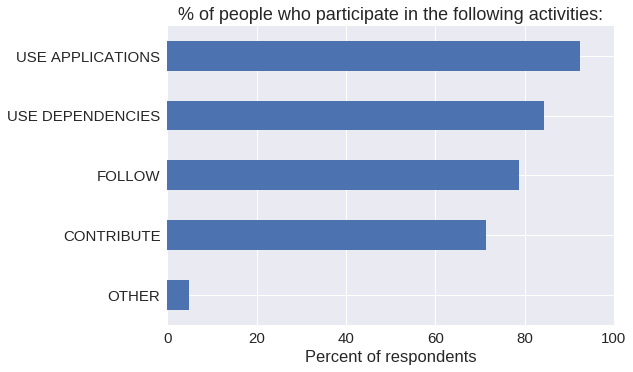

In [32]:
ax = participation_type_prop.plot(kind='barh')

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[19:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
plt.xlim(0,100)
ax.set_yticklabels(labels)

ax.set_xlabel("Percent of respondents")
plt.title("% of people who participate in the following activities:")


### Contributon type: How often do you engage in each of the following activities?

In [33]:
contrib_type_responses = survey_df[contrib_type_vars].apply(pd.Series.value_counts).transpose()

#contrib_type_responses.columns = ["Not at all important", "Slightly important","Don't know", "Somewhat important", "Very important"]
contrib_type_responses = contrib_type_responses[["Never", "Rarely", "Occasionally", "Frequently"]]
contrib_type_responses = contrib_type_responses[["Frequently", "Occasionally", "Rarely", "Never"]]
contrib_type_responses = contrib_type_responses.sort_values(by='Frequently')
contrib_type_responses

,Frequently,Occasionally,Rarely,Never
CONTRIBUTOR.TYPE.COMMUNITY.ADMIN,287,417,867,2412
CONTRIBUTOR.TYPE.CONTRIBUTE.DOCS,460,1214,1665,661
CONTRIBUTOR.TYPE.FEATURE.REQUESTS,573,1625,1346,451
CONTRIBUTOR.TYPE.PROJECT.MAINTENANCE,996,944,974,1090
CONTRIBUTOR.TYPE.FILE.BUGS,1067,2073,768,106
CONTRIBUTOR.TYPE.CONTRIBUTE.CODE,1160,1383,1301,189


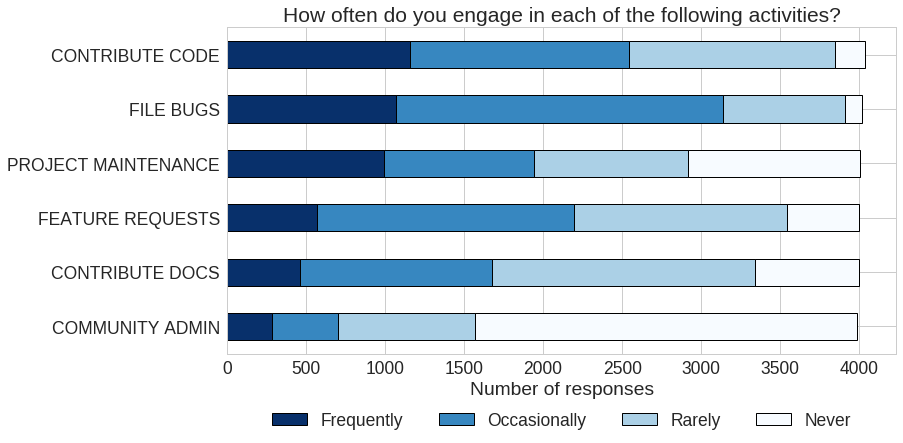

In [34]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues_r
contrib_type_responses.plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[17:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("How often do you engage in each of the following activities?")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### Employment status

In [193]:
prop_df = pd.DataFrame((survey_df['EMPLOYMENT.STATUS'].value_counts()))
prop_df.columns=["count"]
prop_df

,count
Employed full time,3615
Full time student,1048
Employed part time,349
Temporarily not working,314
Other - please describe,184
Retired or permanently not working (e.g. due to disability),90


In [36]:
prop_df = pd.DataFrame((survey_df['EMPLOYMENT.STATUS'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Employed full time,64.553571
Full time student,18.714286
Employed part time,6.232143
Temporarily not working,5.607143
Other - please describe,3.285714
Retired or permanently not working (e.g. due to disability),1.607143


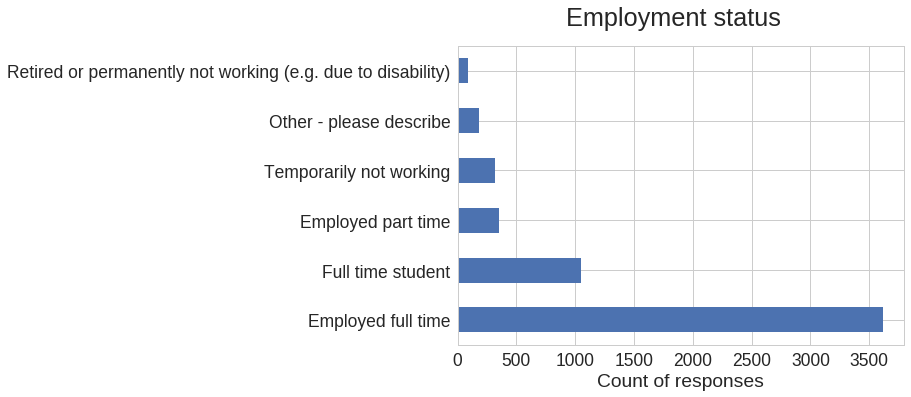

In [37]:
ax = survey_df['EMPLOYMENT.STATUS'].value_counts().plot(kind='barh')
plt.suptitle("Employment status")
ax.set_xlabel("Count of responses")

### Professional software: In your main job, how often do you write or otherwise directly contribute to producing software?

In [194]:
prop_df = pd.DataFrame((survey_df['PROFESSIONAL.SOFTWARE'].value_counts()))
prop_df.columns=["count"]
prop_df

,count
Frequently,2747
Occasionally,542
Rarely,339
Never,279


In [39]:
prop_df = pd.DataFrame((survey_df['PROFESSIONAL.SOFTWARE'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Frequently,70.309701
Occasionally,13.872536
Rarely,8.676734
Never,7.141029


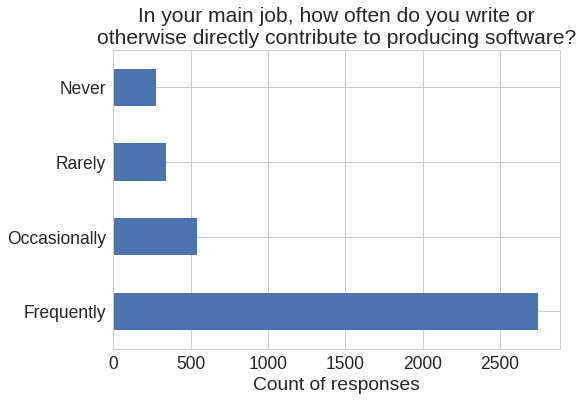

In [40]:
ax = survey_df['PROFESSIONAL.SOFTWARE'].value_counts().plot(kind='barh')
plt.title("In your main job, how often do you write or\notherwise directly contribute to producing software?")
ax.set_xlabel("Count of responses")

### How interested are you in contributing to open source projects in the future?

In [195]:
prop_df = pd.DataFrame((survey_df['FUTURE.CONTRIBUTION.INTEREST'].value_counts()))
prop_df.columns=["count"]
prop_df

,count
Very interested,3929
Somewhat interested,1430
Not too interested,125
Not at all interested,24


In [42]:
prop_df = pd.DataFrame((survey_df['FUTURE.CONTRIBUTION.INTEREST'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Very interested,71.332607
Somewhat interested,25.962237
Not too interested,2.269426
Not at all interested,0.435730


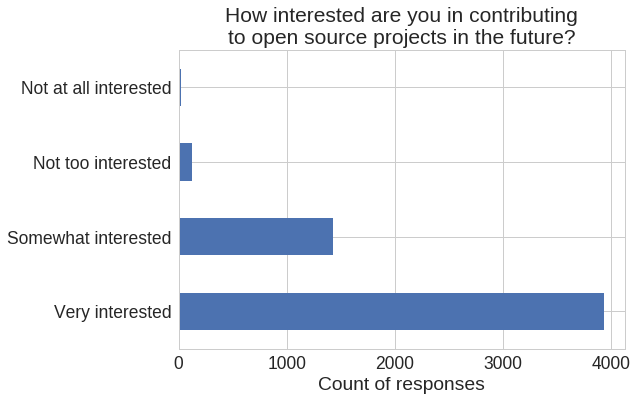

In [43]:
ax = survey_df['FUTURE.CONTRIBUTION.INTEREST'].value_counts().plot(kind='barh')
plt.title("How interested are you in contributing\nto open source projects in the future?")
ax.set_xlabel("Count of responses")

### How likely are you to contribute to open source projects in the future?



In [196]:
prop_df = pd.DataFrame((survey_df['FUTURE.CONTRIBUTION.LIKELIHOOD'].value_counts()))
prop_df.columns=["count"]
prop_df

,count
Very likely,3271
Somewhat likely,1719
Somewhat unlikely,440
Very unlikely,81


In [45]:
prop_df = pd.DataFrame((survey_df['FUTURE.CONTRIBUTION.LIKELIHOOD'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Very likely,59.354019
Somewhat likely,31.192161
Somewhat unlikely,7.984032
Very unlikely,1.469788


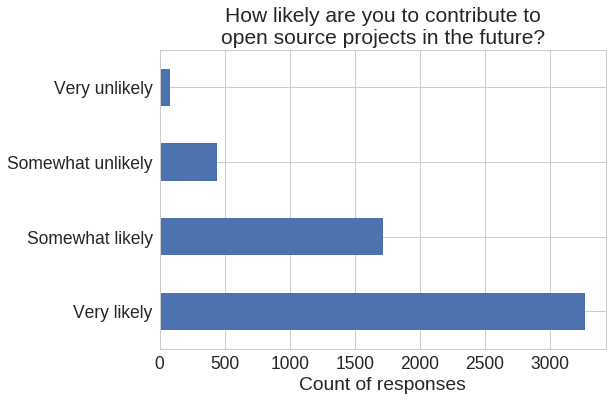

In [46]:
ax = survey_df['FUTURE.CONTRIBUTION.LIKELIHOOD'].value_counts().plot(kind='barh')
plt.title("How likely are you to contribute to\nopen source projects in the future?")
ax.set_xlabel("Count of responses")

## Priorities and values

### When thinking about whether to use open source software, how important are the following things?

In [203]:
user_pri_responses = survey_df[user_pri_vars].apply(pd.Series.value_counts).transpose()

#contrib_type_responses.columns = ["Not at all important", "Slightly important","Don't know", "Somewhat important", "Very important"]
user_pri_responses = user_pri_responses[["Very important to have",
                                             "Somewhat important to have",
                                             "Not important either way",
                                             "Somewhat important not to have",
                                             "Very important not to have",
                                             "Don't know what this is"]]
user_pri_responses = user_pri_responses.sort_values(by="Very important to have")

In [204]:
idx = []
for i in user_pri_responses.index:
    idx.append(i[20:])
idx = pd.Series(idx)    
user_pri_responses.set_index(idx)


,Very important to have,Somewhat important to have,Not important either way,Somewhat important not to have,Very important not to have,Don't know what this is
CLA,490,1024,2282,336,157,488
CODE.OF.CONDUCT,848,1461,1993,166,120,209
WIDESPREAD.USE,984,2067,1576,114,47,28
CONTRIBUTING.GUIDE,1212,1866,1516,95,62,62
WELCOMING.COMMUNITY,2062,1822,812,67,33,18
RESPONSIVE.MAINTAINERS,2575,1850,302,31,35,20
ACTIVE.DEVELOPMENT,2768,1722,267,30,31,16
LICENSE,3125,1160,435,31,33,47


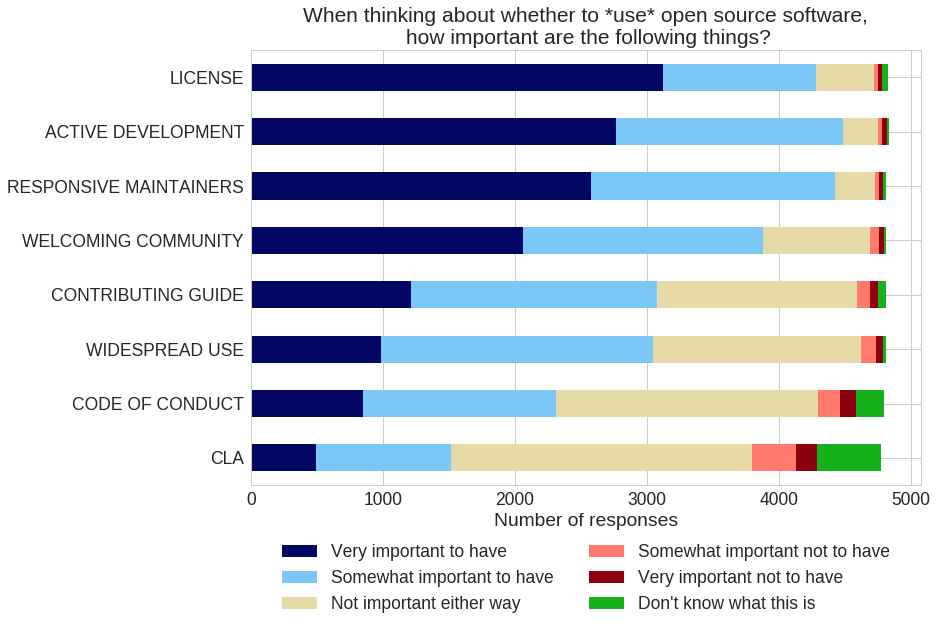

In [48]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.coolwarm
colors = ["xkcd:darkblue", "xkcd:lightblue", "xkcd:beige", "xkcd:salmon", "xkcd:crimson", "xkcd:green"]
user_pri_responses.plot.barh(stacked=True, ax=ax, figsize=[12,8], color=colors)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[20:].replace(".", " ") # cut off "OSS.USER.PRIORITIES."
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)

plt.title("When thinking about whether to *use* open source software,\n how important are the following things?")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.1), ncol=2, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### When thinking about whether to contribute to an open source project, how important are the following things?

In [184]:
contrib_pri_responses = survey_df[contrib_pri_vars].apply(pd.Series.value_counts).transpose()

#contrib_type_responses.columns = ["Not at all important", "Slightly important","Don't know", "Somewhat important", "Very important"]
contrib_pri_responses = contrib_pri_responses[["Very important to have",
                                             "Somewhat important to have",
                                             "Not important either way",
                                             "Somewhat important not to have",
                                             "Very important not to have",
                                             "Don't know what this is"]]

contrib_pri_responses = contrib_pri_responses.sort_values(by="Very important to have")

,Very important to have,Somewhat important to have,Not important either way,Somewhat important not to have,Very important not to have,Don't know what this is
OSS.CONTRIBUTOR.PRIORITIES.WIDESPREAD.USE,387,1016,1666,70,30,12
OSS.CONTRIBUTOR.PRIORITIES.CLA,419,712,1266,327,166,280
OSS.CONTRIBUTOR.PRIORITIES.CODE.OF.CONDUCT,655,1145,1085,119,84,96
OSS.CONTRIBUTOR.PRIORITIES.CONTRIBUTING.GUIDE,1198,1396,500,41,18,24
OSS.CONTRIBUTOR.PRIORITIES.ACTIVE.DEVELOPMENT,1368,1333,448,21,18,5
OSS.CONTRIBUTOR.PRIORITIES.WELCOMING.COMMUNITY,1533,1199,411,21,15,7
OSS.CONTRIBUTOR.PRIORITIES.RESPONSIVE.MAINTAINERS,1994,1022,138,7,16,7
OSS.CONTRIBUTOR.PRIORITIES.LICENSE,2199,610,337,16,15,18


In [206]:
idx = []
for i in contrib_pri_responses.index:
    idx.append(i[27:])
idx = pd.Series(idx)    
contrib_pri_responses.set_index(idx)


,Very important to have,Somewhat important to have,Not important either way,Somewhat important not to have,Very important not to have,Don't know what this is
WIDESPREAD.USE,387,1016,1666,70,30,12
CLA,419,712,1266,327,166,280
CODE.OF.CONDUCT,655,1145,1085,119,84,96
CONTRIBUTING.GUIDE,1198,1396,500,41,18,24
ACTIVE.DEVELOPMENT,1368,1333,448,21,18,5
WELCOMING.COMMUNITY,1533,1199,411,21,15,7
RESPONSIVE.MAINTAINERS,1994,1022,138,7,16,7
LICENSE,2199,610,337,16,15,18


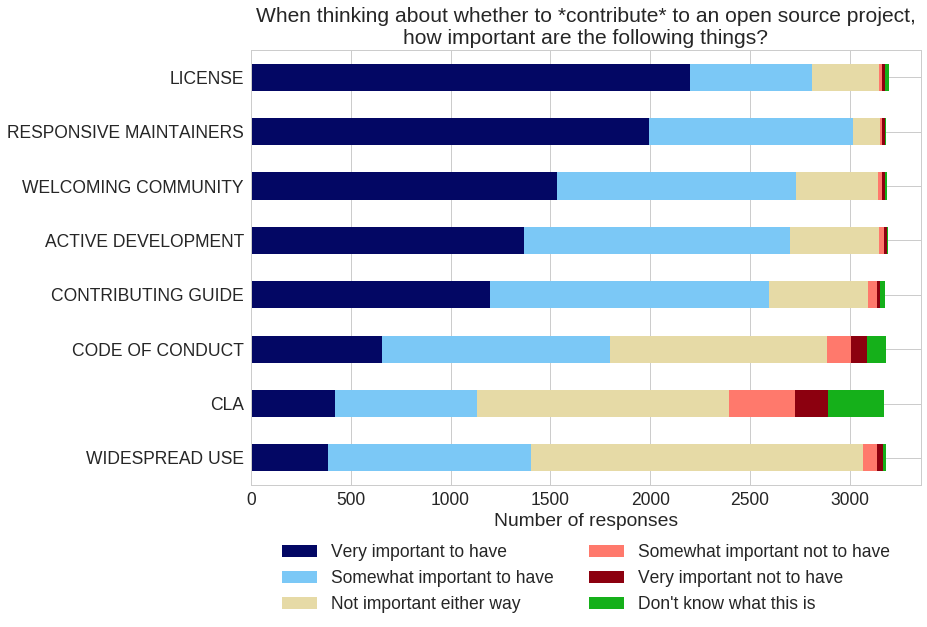

In [50]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.coolwarm
colors = ["xkcd:darkblue", "xkcd:lightblue", "xkcd:beige", "xkcd:salmon", "xkcd:crimson", "xkcd:green"]
contrib_pri_responses.plot.barh(stacked=True, ax=ax, figsize=[12,8], color=colors)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[27:].replace(".", " ") # cut off "OSS.USER.PRIORITIES."
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)

plt.title("When thinking about whether to *contribute* to an open source project,\nhow important are the following things?")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.1), ncol=2, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### How often do you try to find open source options over other kinds of software?

In [185]:
pd.DataFrame(survey_df['SEEK.OPEN.SOURCE'].value_counts())

,SEEK.OPEN.SOURCE
Always,3407
Sometimes,1111
Rarely,100
Never,25


In [52]:
prop_df = pd.DataFrame((survey_df['SEEK.OPEN.SOURCE'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Always,73.379281
Sometimes,23.928495
Rarely,2.153780
Never,0.538445


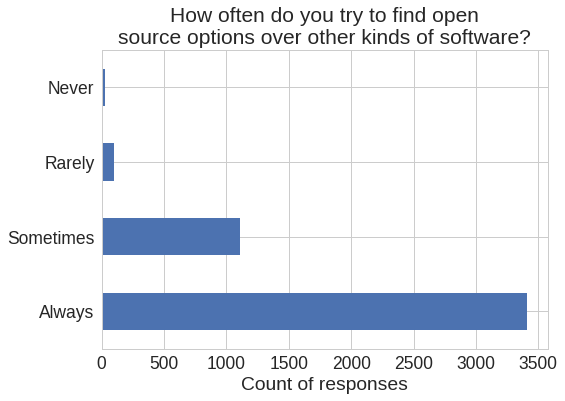

In [53]:
ax = survey_df['SEEK.OPEN.SOURCE'].value_counts().plot(kind='barh')
plt.title("How often do you try to find open\nsource options over other kinds of software?")
ax.set_xlabel("Count of responses")

### Do you believe that open source software is generally easier to use than closed source (proprietary) software, harder to use, or about the same?

In [186]:
pd.DataFrame(survey_df['OSS.UX'].value_counts())


,OSS.UX
About the same,2027
Generally easier to use,1597
Generally harder to use,897


In [55]:
prop_df = pd.DataFrame((survey_df['OSS.UX'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
About the same,44.835213
Generally easier to use,35.324043
Generally harder to use,19.840743


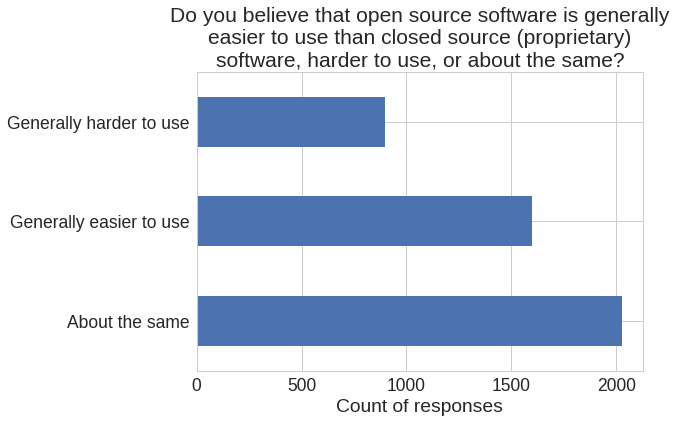

In [56]:
ax = survey_df['OSS.UX'].value_counts().plot(kind='barh')
plt.title("Do you believe that open source software is generally\neasier to use than closed source (proprietary)\nsoftware, harder to use, or about the same?")
ax.set_xlabel("Count of responses")

### Do you believe that open source software is generally more secure than closed source (proprietary) software, less secure, or about the same?

In [187]:
pd.DataFrame(survey_df['OSS.SECURITY'].value_counts())


,OSS.SECURITY
Generally more secure,2688
About the same,1537
Generally less secure,295


In [58]:
prop_df = pd.DataFrame((survey_df['OSS.SECURITY'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Generally more secure,59.469027
About the same,34.004425
Generally less secure,6.526549


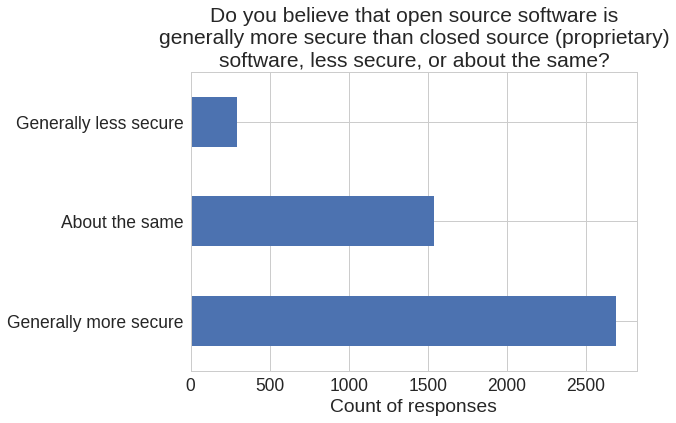

In [188]:
ax = survey_df['OSS.SECURITY'].value_counts().plot(kind='barh')
plt.title("Do you believe that open source software is\ngenerally more secure than closed source (proprietary)\nsoftware, less secure, or about the same?")
t = ax.set_xlabel("Count of responses")

### Do you believe that open source software is generally easier to use than closed source (proprietary) software, harder to use, or about the same?

In [189]:
pd.DataFrame(survey_df['OSS.STABILITY'].value_counts())


,OSS.STABILITY
About the same,2240
Generally more stable,1399
Generally less stable,877


In [61]:
prop_df = pd.DataFrame((survey_df['OSS.STABILITY'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
About the same,49.601417
Generally more stable,30.978742
Generally less stable,19.419841


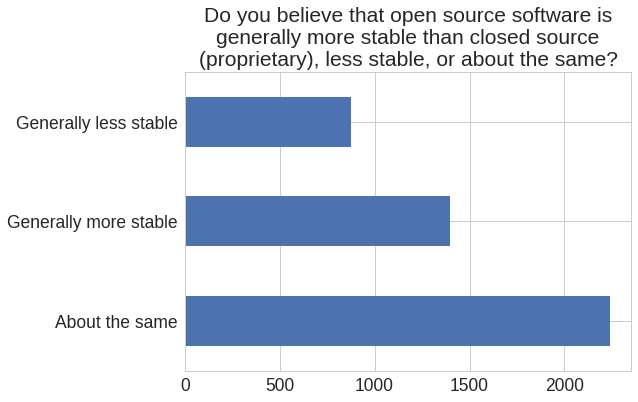

In [190]:
survey_df['OSS.STABILITY'].value_counts().plot(kind='barh')
plt.title("Do you believe that open source software is\ngenerally more stable than closed source\n(proprietary), less stable, or about the same?")
t = ax.set_xlabel("Count of responses")

### Identification w/ open source

In [63]:
oss_id_vars = ["INTERNAL.EFFICACY", "EXTERNAL.EFFICACY", "OSS.IDENTIFICATION"]

In [191]:
oss_id_responses = survey_df[oss_id_vars].apply(pd.Series.value_counts).transpose()

#contrib_type_responses.columns = ["Not at all important", "Slightly important","Don't know", "Somewhat important", "Very important"]
oss_id_responses = oss_id_responses[["Strongly agree",
                                     "Somewhat agree",
                                     "Neither agree nor disagree",
                                     "Somewhat disagree",
                                     "Strongly disagree"]]
oss_id_responses = oss_id_responses.sort_values(by="Strongly agree")
oss_id_responses.transpose()

,EXTERNAL.EFFICACY,OSS.IDENTIFICATION,INTERNAL.EFFICACY
Strongly agree,1518,1579,2052
Somewhat agree,1610,1513,1685
Neither agree nor disagree,1116,863,418
Somewhat disagree,150,351,240
Strongly disagree,58,150,62


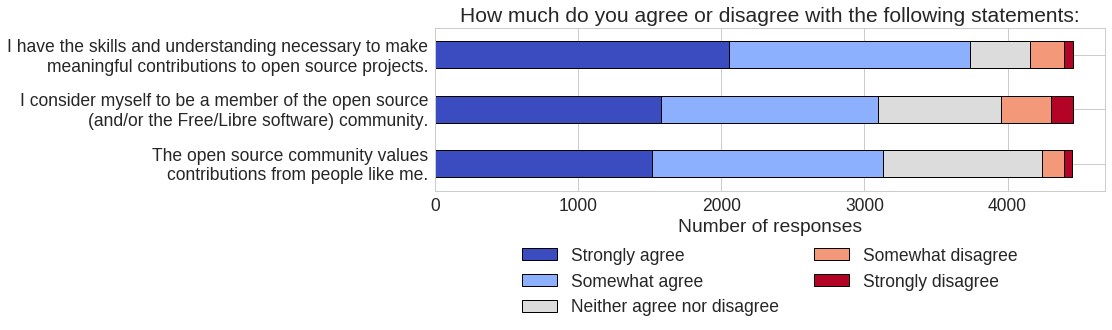

In [65]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.coolwarm
colors = ["xkcd:darkblue", "xkcd:lightblue", "xkcd:beige", "xkcd:salmon", "xkcd:crimson"]
oss_id_responses.plot.barh(stacked=True, ax=ax, figsize=[12,3], cmap=matplotlib.cm.coolwarm, edgecolor='black', linewidth=1)

#print(str(ax.get_yticklabels()))

ax.set_yticklabels(["The open source community values\ncontributions from people like me.",
    "I consider myself to be a member of the open source\n(and/or the Free/Libre software) community.",
    "I have the skills and understanding necessary to make\nmeaningful contributions to open source projects."])


plt.title("How much do you agree or disagree with the following statements:")

plt.xlabel("Number of responses")


legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.25), ncol=2, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



## Transparency vs privacy

### Attribution

In [66]:
pd.DataFrame(survey_df['TRANSPARENCY.PRIVACY.BELIEFS'].value_counts())

,TRANSPARENCY.PRIVACY.BELIEFS
"People should be able to contribute code without attribution, if they wish to remain anonymous.",2454
Records of authorship should be required so that end users know who created the source code they are working with.,1594


In [67]:
prop_df = pd.DataFrame((survey_df['TRANSPARENCY.PRIVACY.BELIEFS'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
"People should be able to contribute code without attribution, if they wish to remain anonymous.",60.62253
Records of authorship should be required so that end users know who created the source code they are working with.,39.37747


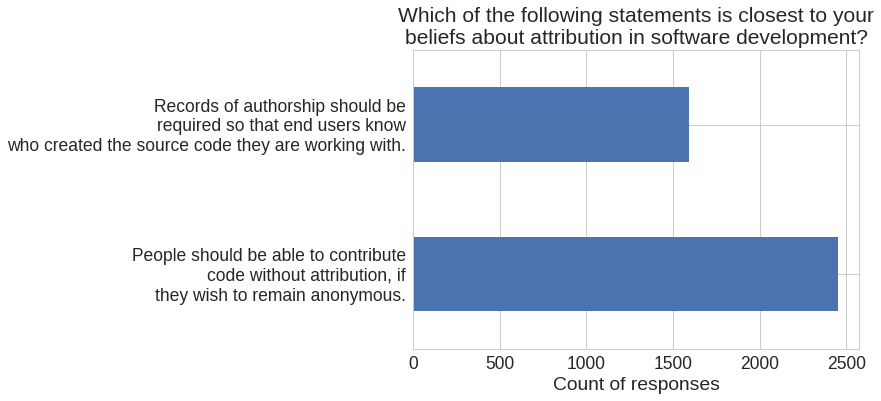

In [68]:
ax = survey_df['TRANSPARENCY.PRIVACY.BELIEFS'].value_counts().plot(kind='barh')
plt.title("Which of the following statements is closest to your\nbeliefs about attribution in software development?")
ax.set_yticklabels(["People should be able to contribute\ncode without attribution, if\nthey wish to remain anonymous.",
                    "Records of authorship should be\nrequired so that end users know\nwho created the source code they are working with."])
ax.set_xlabel("Count of responses")

### In general, how much information about you is publicly available online?

In [69]:
survey_df['INFO.AVAILABILITY'].value_counts()

Some information about me         1776
A little information about me     1133
A lot of information about me     1011
No information at all about me     140
Name: INFO.AVAILABILITY, dtype: int64

In [70]:
prop_df = pd.DataFrame((survey_df['INFO.AVAILABILITY'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Some information about me,43.743842
A little information about me,27.906404
A lot of information about me,24.901478
No information at all about me,3.448276


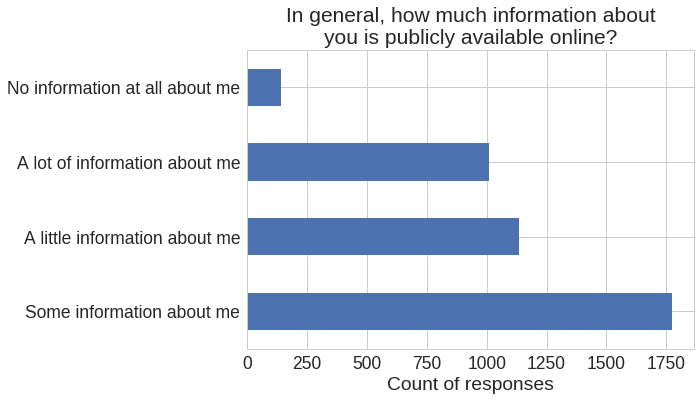

In [71]:
ax = survey_df['INFO.AVAILABILITY'].value_counts().plot(kind='barh')
plt.title("In general, how much information about\nyou is publicly available online?")
ax.set_xlabel("Count of responses")


### Do you feel that you need to make information available about yourself online for professional reasons?



In [72]:
survey_df['INFO.JOB'].value_counts()

Yes    2327
No     1638
Name: INFO.JOB, dtype: int64

In [73]:
prop_df = pd.DataFrame((survey_df['INFO.JOB'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Yes,58.688525
No,41.311475


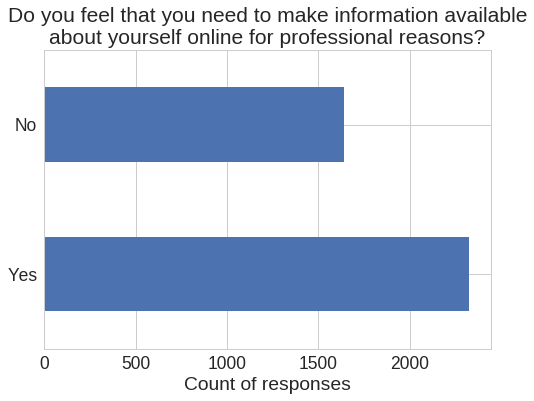

In [74]:
ax = survey_df['INFO.JOB'].value_counts().plot(kind='barh')
plt.title("Do you feel that you need to make information available\nabout yourself online for professional reasons?")
ax.set_xlabel("Count of responses")


### General privacy practices

"Which of the following best describes your practices around publishing content online, such as posts on social media (e.g. Facebook, Instagram, Twitter, etc.), blogs, and other platforms (not including contributions to open source projects)?" (single choice)

In [75]:
pd.DataFrame(survey_df['TRANSPARENCY.PRIVACY.PRACTICES.GENERAL'].value_counts())

,TRANSPARENCY.PRIVACY.PRACTICES.GENERAL
I include my real name.,1718
I usually use a consistent pseudonym that is easily linked to my real name online.,1141
I don't publish this kind of content online.,517
I usually use a consistent pseudonym that is not linked anywhere with my real name online.,363
I take precautions to use different pseudonymns on different platforms.,270


In [76]:
prop_df = pd.DataFrame((survey_df['TRANSPARENCY.PRIVACY.PRACTICES.GENERAL'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
I include my real name.,42.853579
I usually use a consistent pseudonym that is easily linked to my real name online.,28.460963
I don't publish this kind of content online.,12.895984
I usually use a consistent pseudonym that is not linked anywhere with my real name online.,9.054627
I take precautions to use different pseudonymns on different platforms.,6.734847


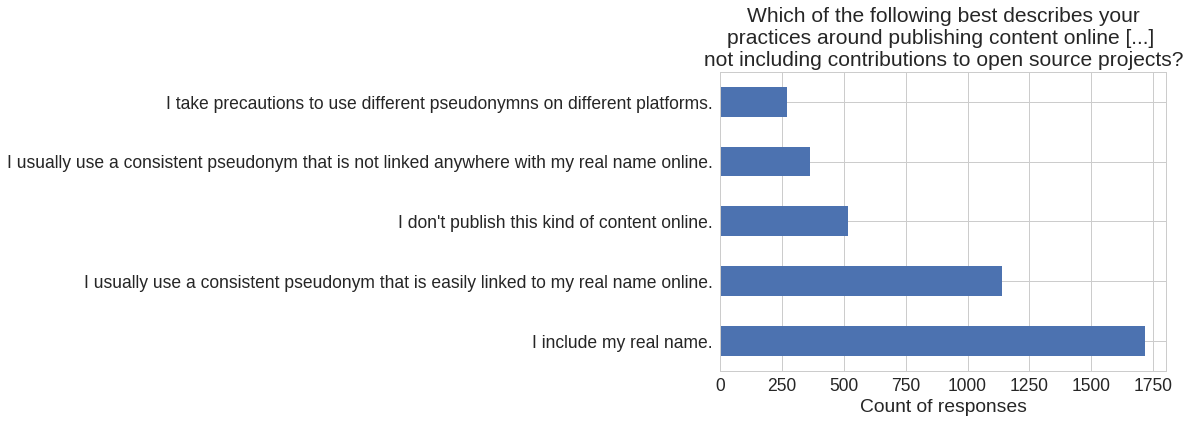

In [77]:
ax = survey_df['TRANSPARENCY.PRIVACY.PRACTICES.GENERAL'].value_counts().plot(kind='barh')
plt.title("Which of the following best describes your\npractices around publishing content online [...] \nnot including contributions to open source projects?")
ax.set_xlabel("Count of responses")

### OSS privacy practices

"Which of the following best describes your practices when making open source contributions?"

In [78]:
pd.DataFrame(survey_df['TRANSPARENCY.PRIVACY.PRACTICES.OSS'].value_counts())

,TRANSPARENCY.PRIVACY.PRACTICES.OSS
I include my real name.,1845
I usually contribute using a consistent pseudonym that is easily linked to my real name online.,766
I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online.,273
I take precautions to use different usernames in different projects.,42


In [79]:
prop_df = pd.DataFrame((survey_df['TRANSPARENCY.PRIVACY.PRACTICES.OSS'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
I include my real name.,63.055366
I usually contribute using a consistent pseudonym that is easily linked to my real name online.,26.179084
I usually contribute using a consistent pseudonym that is not linked anywhere with my real name online.,9.330144
I take precautions to use different usernames in different projects.,1.435407


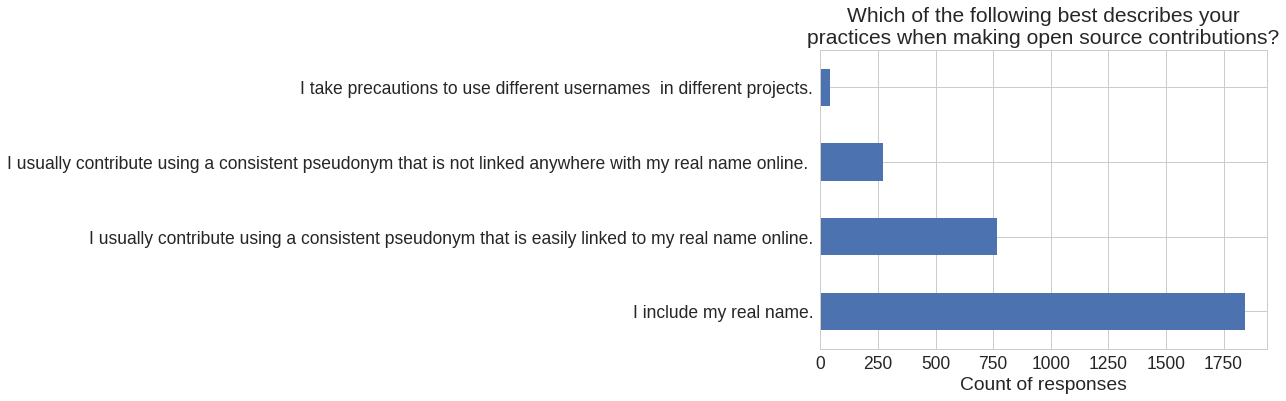

In [80]:
ax = survey_df['TRANSPARENCY.PRIVACY.PRACTICES.OSS'].value_counts().plot(kind='barh')
plt.title("Which of the following best describes your\npractices when making open source contributions?")
ax.set_xlabel("Count of responses")

## Mentorship / Help

### Have you ever received any kind of help from other people related to using or contributing to an open source project?

In [81]:
survey_df['RECEIVED.HELP'].value_counts()

Yes    2845
No     1064
Name: RECEIVED.HELP, dtype: int64

In [82]:
prop_df = pd.DataFrame((survey_df['RECEIVED.HELP'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Yes,72.780762
No,27.219238


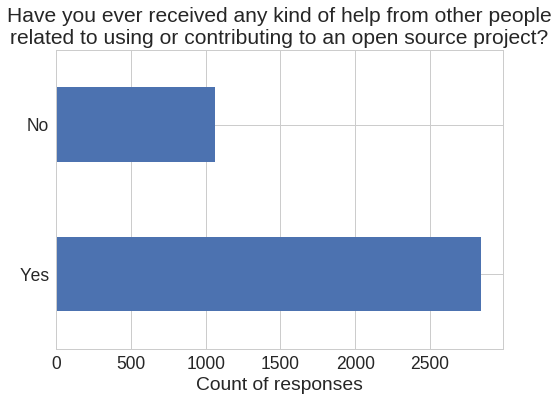

In [83]:
ax = survey_df['RECEIVED.HELP'].value_counts().plot(kind='barh')
plt.title("Have you ever received any kind of help from other people\nrelated to using or contributing to an open source project?")
ax.set_xlabel("Count of responses")

### Thinking of the most recent case where someone helped you, how did you find someone to help you?

In [84]:
pd.DataFrame(survey_df['FIND.HELPER'].value_counts())

,FIND.HELPER
"I asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and someone responded.",2057
I asked a specific person for help.,403
Someone offered me unsolicited help.,272
Other - Please describe,64


In [85]:
prop_df = pd.DataFrame((survey_df['FIND.HELPER'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
"I asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and someone responded.",73.569385
I asked a specific person for help.,14.413448
Someone offered me unsolicited help.,9.728183
Other - Please describe,2.288984


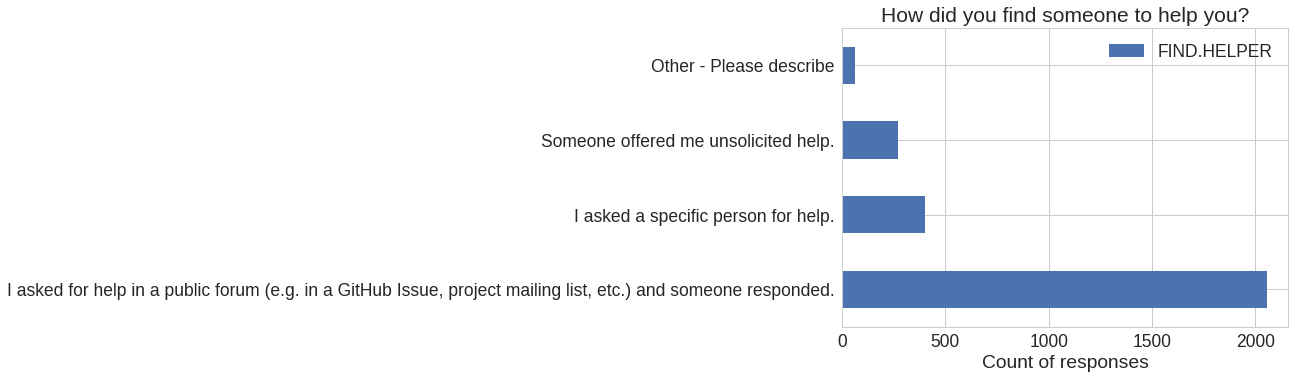

In [86]:
ax = pd.DataFrame(survey_df['FIND.HELPER'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("How did you find someone to help you?")

### Which best describes your prior relationship with the person who helped you?

In [87]:
pd.DataFrame(survey_df['HELPER.PRIOR.RELATIONSHIP'].value_counts())

,HELPER.PRIOR.RELATIONSHIP
"Total strangers, I didn't know of them previously.",1565
"I knew of them through their contributions to projects, but didn't know them personally.",809
We knew each other a little.,211
We knew each other well.,208


In [88]:
prop_df = pd.DataFrame((survey_df['HELPER.PRIOR.RELATIONSHIP'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
"Total strangers, I didn't know of them previously.",56.032939
"I knew of them through their contributions to projects, but didn't know them personally.",28.965270
We knew each other a little.,7.554601
We knew each other well.,7.447189


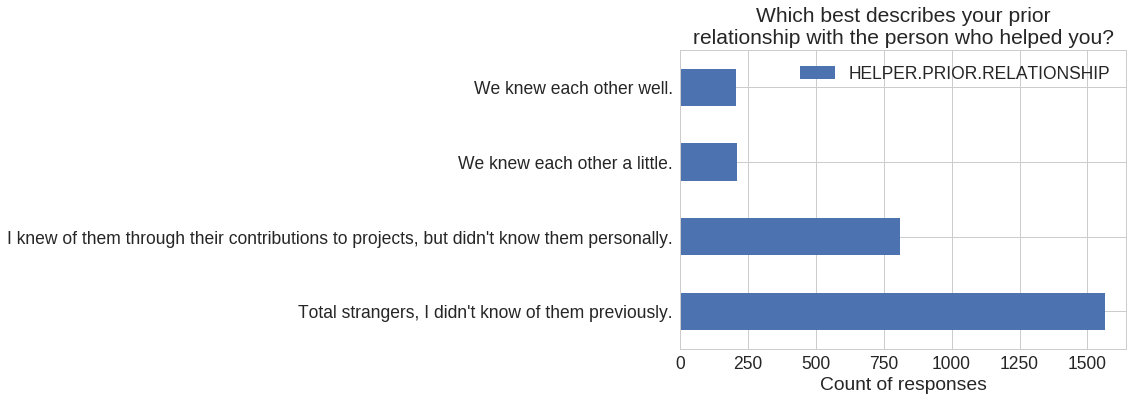

In [89]:
ax = pd.DataFrame(survey_df['HELPER.PRIOR.RELATIONSHIP'].value_counts()).plot(kind='barh')
plt.title("Which best describes your prior\nrelationship with the person who helped you?")
ax.set_xlabel("Count of responses")

### What kind of problem did they help you with?

In [90]:
pd.DataFrame(survey_df['RECEIVED.HELP.TYPE'].value_counts())

,RECEIVED.HELP.TYPE
Writing code or otherwise implementing ideas.,1633
Installing or using an application.,820
"Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).",181
Other (please describe),142
Introductions to other people,13


In [91]:
prop_df = pd.DataFrame((survey_df['RECEIVED.HELP.TYPE'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Writing code or otherwise implementing ideas.,58.551452
Installing or using an application.,29.401219
"Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).",6.489781
Other (please describe),5.091431
Introductions to other people,0.466117


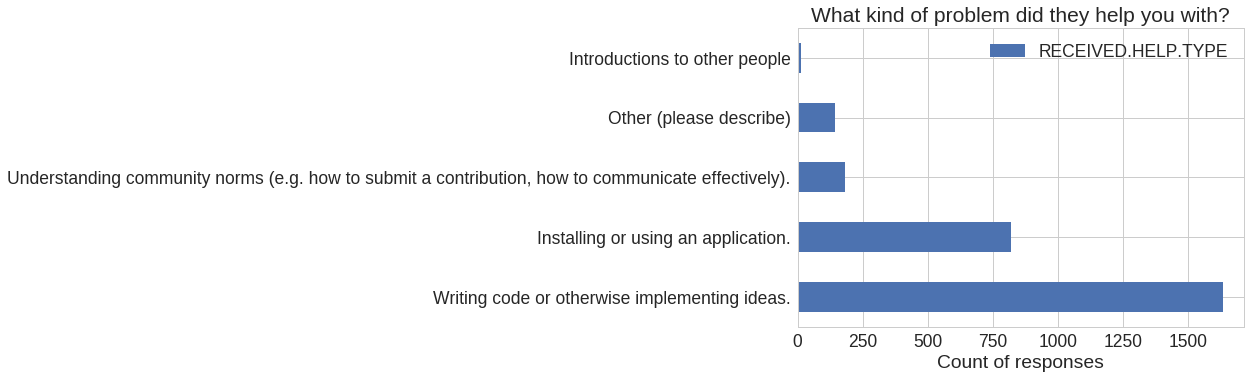

In [92]:
ax = pd.DataFrame(survey_df['RECEIVED.HELP.TYPE'].value_counts()).plot(kind='barh')
plt.title("What kind of problem did they help you with?")
ax.set_xlabel("Count of responses")

### Have you ever provided help for another person on an open source project?

In [93]:
pd.DataFrame(survey_df['PROVIDED.HELP'].value_counts())

,PROVIDED.HELP
Yes,2891
No,1013


In [94]:
prop_df = pd.DataFrame((survey_df['PROVIDED.HELP'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Yes,74.052254
No,25.947746


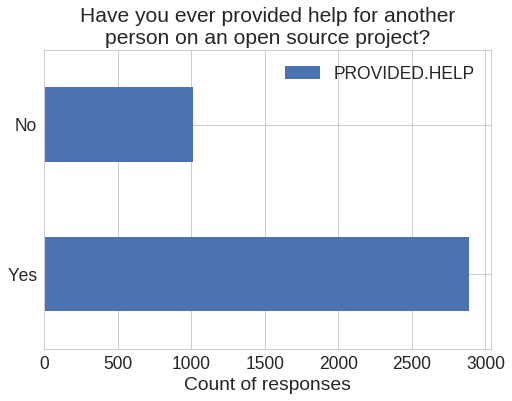

In [95]:
ax = pd.DataFrame(survey_df['PROVIDED.HELP'].value_counts()).plot(kind='barh')
plt.title("Have you ever provided help for another\nperson on an open source project?")
ax.set_xlabel("Count of responses")

### Thinking of the most recent case where you helped someone, how did you come to help this person?

In [96]:
pd.DataFrame(survey_df['FIND.HELPEE'].value_counts())

,FIND.HELPEE
"They asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and I responded.",1839
They asked me directly for help.,566
I reached out to them to offer unsolicited help.,405
Other (please describe),28


In [97]:
prop_df = pd.DataFrame((survey_df['FIND.HELPEE'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
"They asked for help in a public forum (e.g. in a GitHub Issue, project mailing list, etc.) and I responded.",64.799154
They asked me directly for help.,19.943622
I reached out to them to offer unsolicited help.,14.270613
Other (please describe),0.986610


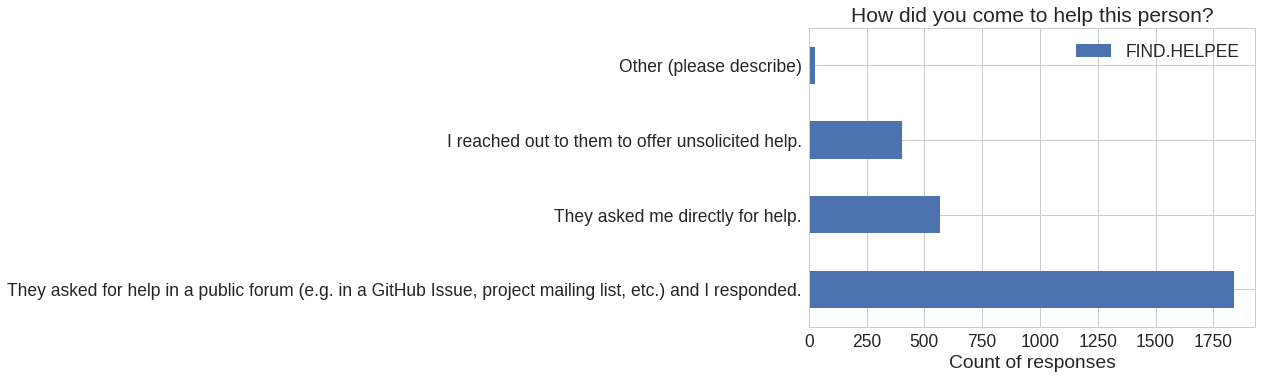

In [98]:
ax = pd.DataFrame(survey_df['FIND.HELPEE'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("How did you come to help this person?")

### Which best describes your prior relationship with the person you helped?

In [99]:
pd.DataFrame(survey_df['HELPEE.PRIOR.RELATIONSHIP'].value_counts())

,HELPEE.PRIOR.RELATIONSHIP
"Total strangers, I didn't know of them previously.",1984
We knew each other well.,292
"I knew of them through their contributions to projects, but didn't know them personally.",288
We knew each other a little.,275


In [100]:
prop_df = pd.DataFrame((survey_df['HELPEE.PRIOR.RELATIONSHIP'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
"Total strangers, I didn't know of them previously.",69.883762
We knew each other well.,10.285312
"I knew of them through their contributions to projects, but didn't know them personally.",10.144417
We knew each other a little.,9.686509


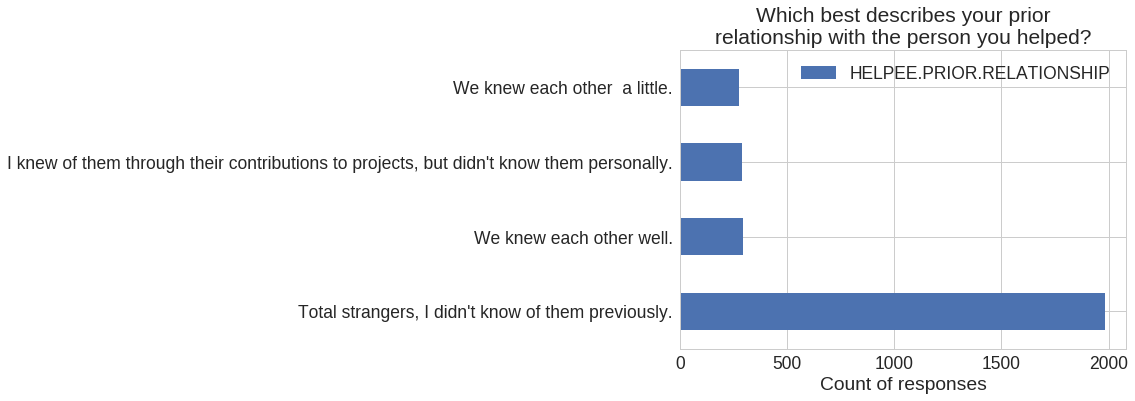

In [101]:
ax = pd.DataFrame(survey_df['HELPEE.PRIOR.RELATIONSHIP'].value_counts()).plot(kind='barh')
plt.title("Which best describes your prior\nrelationship with the person you helped?")
ax.set_xlabel("Count of responses")

### What kind of problem did you help them with?

In [102]:
pd.DataFrame(survey_df['PROVIDED.HELP.TYPE'].value_counts())

,PROVIDED.HELP.TYPE
Writing code or otherwise implementing ideas.,1602
Installing or using an application.,1028
Other (please describe),101
"Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).",99
Introductions to other people.,8


In [103]:
prop_df = pd.DataFrame((survey_df['PROVIDED.HELP.TYPE'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Writing code or otherwise implementing ideas.,56.448203
Installing or using an application.,36.222692
Other (please describe),3.558844
"Understanding community norms (e.g. how to submit a contribution, how to communicate effectively).",3.488372
Introductions to other people.,0.281889


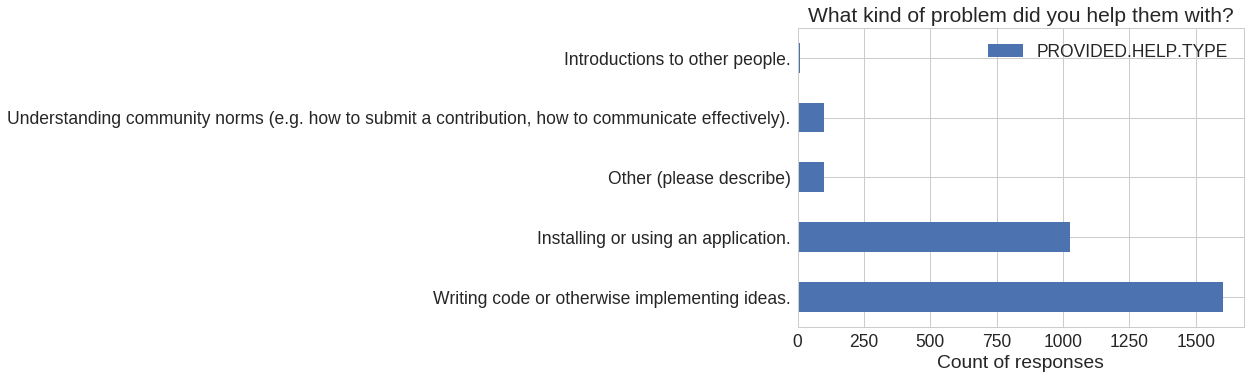

In [104]:
ax = pd.DataFrame(survey_df['PROVIDED.HELP.TYPE'].value_counts()).plot(kind='barh')
plt.title("What kind of problem did you help them with?")
ax.set_xlabel("Count of responses")

## Open Source Software in Paid Work

### Do you contribute to open source as part of your professional work? 

In other words, are you paid for any of your time spent on open source contributions?

In [105]:
pd.DataFrame(survey_df['OSS.AS.JOB'].value_counts())

,OSS.AS.JOB
"Yes, indirectly- I contribute to open source in carrying out my work duties, but I am not required or expected to do so.",896
No.,687
"Yes, directly- some or all of my work duties include contributing to open source projects.",464


In [106]:
prop_df = pd.DataFrame((survey_df['OSS.AS.JOB'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
"Yes, indirectly- I contribute to open source in carrying out my work duties, but I am not required or expected to do so.",43.771373
No.,33.561309
"Yes, directly- some or all of my work duties include contributing to open source projects.",22.667318


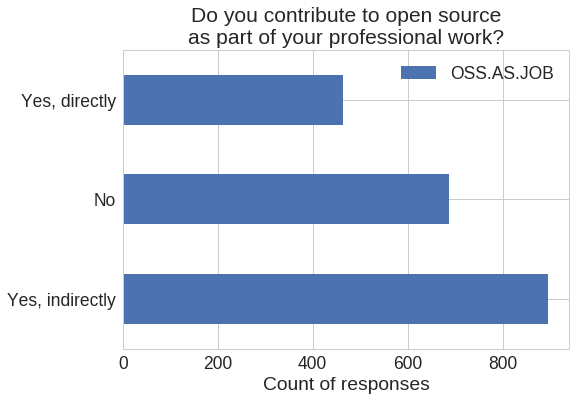

In [107]:
oss_as_job_df = pd.DataFrame(survey_df['OSS.AS.JOB'].value_counts())
oss_as_job_df.index = ["Yes, indirectly", "No", "Yes, directly"]
ax = oss_as_job_df.plot(kind='barh')
plt.title("Do you contribute to open source\nas part of your professional work?")
ax.set_xlabel("Count of responses")

### How often do you use open source software in your professional work?

In [108]:
pd.DataFrame(survey_df['OSS.AT.WORK'].value_counts())

,OSS.AT.WORK
Frequently,2191
Sometimes,300
Rarely,110
Never,65


In [109]:
prop_df = pd.DataFrame((survey_df['OSS.AT.WORK'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Frequently,82.183046
Sometimes,11.252813
Rarely,4.126032
Never,2.438110


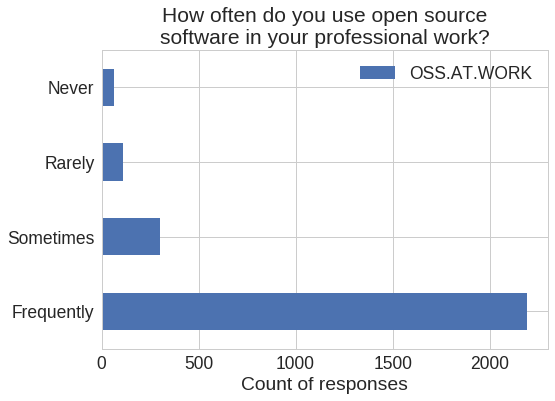

In [110]:
ax = pd.DataFrame(survey_df['OSS.AT.WORK'].value_counts()).plot(kind='barh')
plt.title("How often do you use open source\nsoftware in your professional work?")
ax.set_xlabel("Count of responses")

### How does your employer's intellectual property agreement/policy affect your free-time contributions to open source unrelated to your work?

In [111]:
pd.DataFrame(survey_df['OSS.IP.POLICY'].value_counts())

,OSS.IP.POLICY
I am free to contribute without asking for permission.,1178
My employer doesn't have a clear policy on this.,695
"I am permitted to contribute to open source, but need to ask for permission.",287
I'm not sure.,238
Not applicable,180
I am not permitted to contribute to open source at all.,63


In [112]:
prop_df = pd.DataFrame((survey_df['OSS.IP.POLICY'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
I am free to contribute without asking for permission.,44.604317
My employer doesn't have a clear policy on this.,26.315789
"I am permitted to contribute to open source, but need to ask for permission.",10.867096
I'm not sure.,9.011738
Not applicable,6.815600
I am not permitted to contribute to open source at all.,2.385460


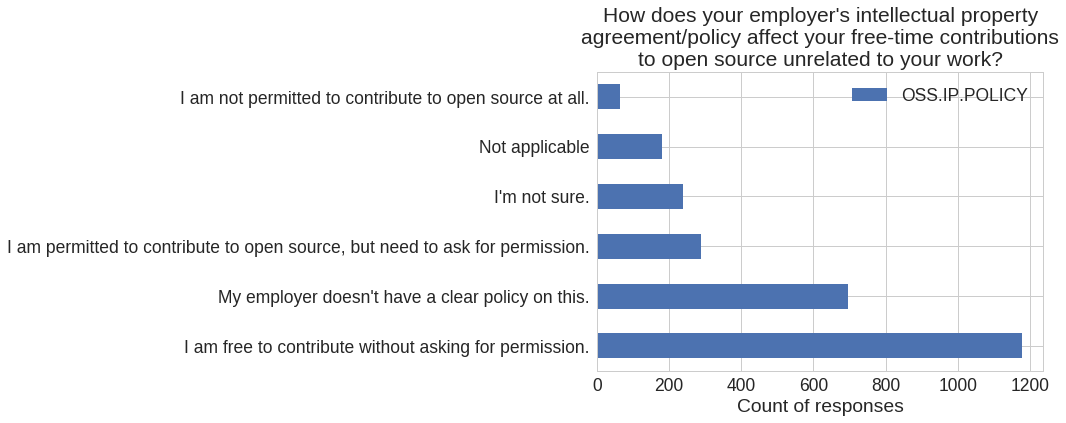

In [113]:
ax = pd.DataFrame(survey_df['OSS.IP.POLICY'].value_counts()).plot(kind='barh')
plt.title("How does your employer's intellectual property\nagreement/policy affect your free-time contributions\nto open source unrelated to your work?")
ax.set_xlabel("Count of responses")

### Which is closest to your employer’s policy on using open source software applications?

In [114]:
pd.DataFrame(survey_df['EMPLOYER.POLICY.APPLICATIONS'].value_counts())

,EMPLOYER.POLICY.APPLICATIONS
Use of open source applications is encouraged.,1174
Use of open source applications is acceptable if it is the most appropriate tool.,916
My employer doesn't have a clear policy on this.,338
Not applicable,88
I'm not sure.,83
"Use of open source applications is rarely, if ever, permitted.",42


In [115]:
prop_df = pd.DataFrame((survey_df['EMPLOYER.POLICY.APPLICATIONS'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Use of open source applications is encouraged.,44.452859
Use of open source applications is acceptable if it is the most appropriate tool.,34.683832
My employer doesn't have a clear policy on this.,12.798183
Not applicable,3.332071
I'm not sure.,3.142749
"Use of open source applications is rarely, if ever, permitted.",1.590307


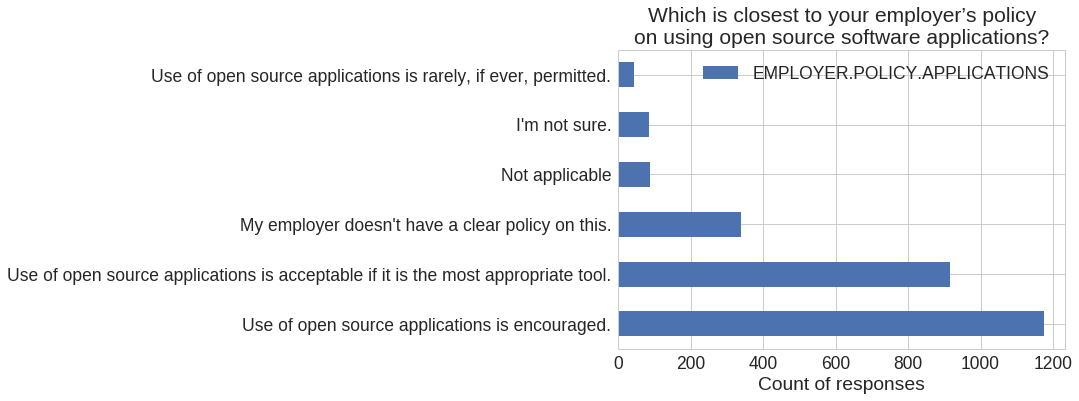

In [116]:
ax = pd.DataFrame(survey_df['EMPLOYER.POLICY.APPLICATIONS'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("Which is closest to your employer’s policy\non using open source software applications?")

### How important do you think your involvement in open source was to getting your current job?

In [117]:
pd.DataFrame(survey_df['OSS.HIRING'].value_counts())

,OSS.HIRING
Very important,618
Somewhat important,448
Not at all important,361
Not too important,352
Not applicable-I hadn't made any contributions when I got this job.,254


In [118]:
prop_df = pd.DataFrame((survey_df['OSS.HIRING'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Very important,30.398426
Somewhat important,22.036399
Not at all important,17.757009
Not too important,17.314314
Not applicable-I hadn't made any contributions when I got this job.,12.493851


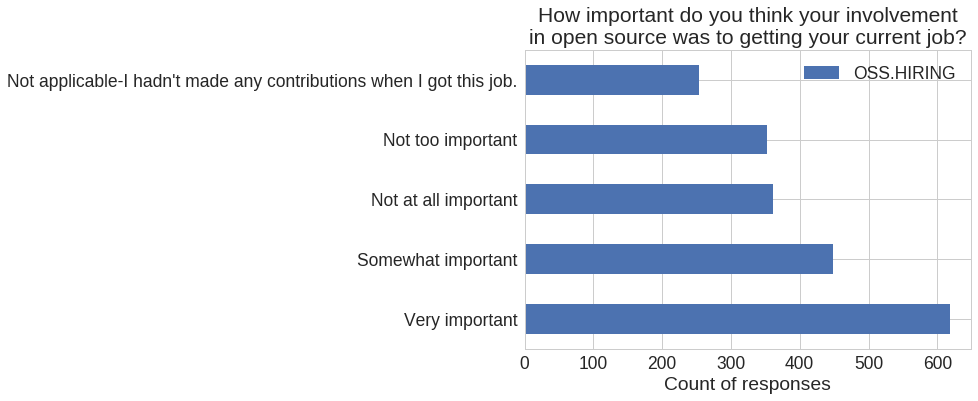

In [119]:
ax = pd.DataFrame(survey_df['OSS.HIRING'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("How important do you think your involvement\nin open source was to getting your current job?")

## Demographics

### Do you currently live in a country other than the one in which you were born?

In [120]:
pd.DataFrame(survey_df['IMMIGRATION'].value_counts())

,IMMIGRATION
"No, I live in the country where I was born.",2764
"Yes, and I intend to stay permanently.",513
"Yes, and I am not sure about my future plans.",292
"Yes, and I intend to stay temporarily.",165


In [121]:
prop_df = pd.DataFrame((survey_df['IMMIGRATION'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
"No, I live in the country where I was born.",74.022496
"Yes, and I intend to stay permanently.",13.738618
"Yes, and I am not sure about my future plans.",7.820032
"Yes, and I intend to stay temporarily.",4.418854


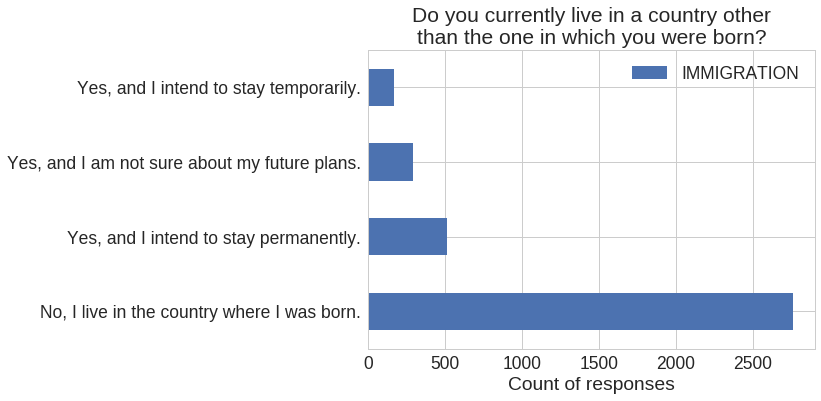

In [122]:
ax = pd.DataFrame(survey_df['IMMIGRATION'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("Do you currently live in a country other\nthan the one in which you were born?")

### Thinking of where you were born, are you a member of an ethnicity or nationality that is a considered a minority in that country?

In [123]:
pd.DataFrame(survey_df['MINORITY.HOMECOUNTRY'].value_counts())

,MINORITY.HOMECOUNTRY
No,754
Yes,124
Not sure,45
Prefer not to say,34


In [124]:
prop_df = pd.DataFrame((survey_df['MINORITY.HOMECOUNTRY'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
No,78.787879
Yes,12.957158
Not sure,4.702194
Prefer not to say,3.552769


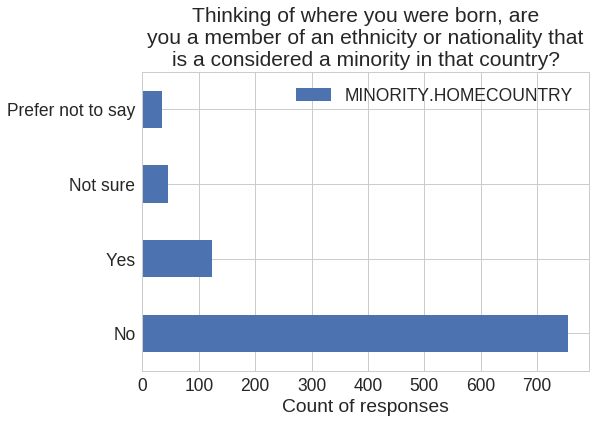

In [125]:
ax = pd.DataFrame(survey_df['MINORITY.HOMECOUNTRY'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("Thinking of where you were born, are\nyou a member of an ethnicity or nationality that\nis a considered a minority in that country?")

### Thinking of where you currently live, are you a member of an ethnicity or nationality that is a considered a minority in that country?

In [126]:
pd.DataFrame(survey_df['MINORITY.CURRENT.COUNTRY'].value_counts())

,MINORITY.CURRENT.COUNTRY
No,2837
Yes,546
Not sure,193
Prefer not to say,156


In [127]:
prop_df = pd.DataFrame((survey_df['MINORITY.CURRENT.COUNTRY'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
No,76.018221
Yes,14.630225
Not sure,5.171490
Prefer not to say,4.180064


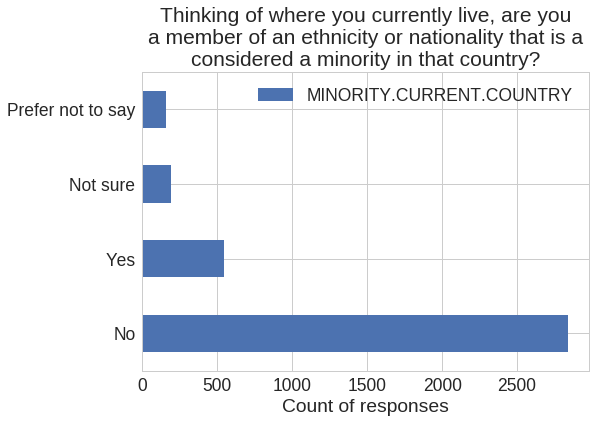

In [128]:
ax = pd.DataFrame(survey_df['MINORITY.CURRENT.COUNTRY'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("Thinking of where you currently live, are you\na member of an ethnicity or nationality that is a\nconsidered a minority in that country?")

### What is your gender?

In [129]:
pd.DataFrame(survey_df['GENDER'].value_counts())

,GENDER
Man,3387
Prefer not to say,173
Woman,125
Non-binary or Other,39


In [130]:
prop_df = pd.DataFrame((survey_df['GENDER'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Man,90.950591
Prefer not to say,4.645542
Woman,3.356606
Non-binary or Other,1.047261


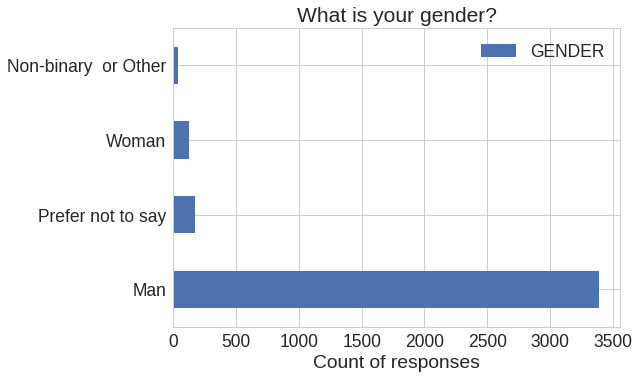

In [131]:
ax = pd.DataFrame(survey_df['GENDER'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("What is your gender?")

### Do you identify as transgender?



In [132]:
pd.DataFrame(survey_df['TRANSGENDER.IDENTITY'].value_counts())

,TRANSGENDER.IDENTITY
No,3494
Prefer not to say,158
Yes,33
Not sure,30


In [133]:
prop_df = pd.DataFrame((survey_df['TRANSGENDER.IDENTITY'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
No,94.051144
Prefer not to say,4.253028
Yes,0.888291
Not sure,0.807537


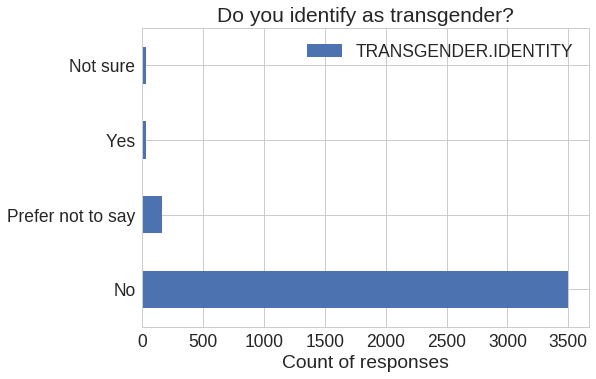

In [134]:
ax = pd.DataFrame(survey_df['TRANSGENDER.IDENTITY'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("Do you identify as transgender?")

### Do you identify as gay, lesbian, or bisexual, asexual, or any other minority sexual orientation?

In [135]:
pd.DataFrame(survey_df['SEXUAL.ORIENTATION'].value_counts())

,SEXUAL.ORIENTATION
No,3187
Yes,246
Prefer not to say,201
Not sure,85


In [136]:
prop_df = pd.DataFrame((survey_df['SEXUAL.ORIENTATION'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
No,85.695079
Yes,6.614681
Prefer not to say,5.404679
Not sure,2.285561


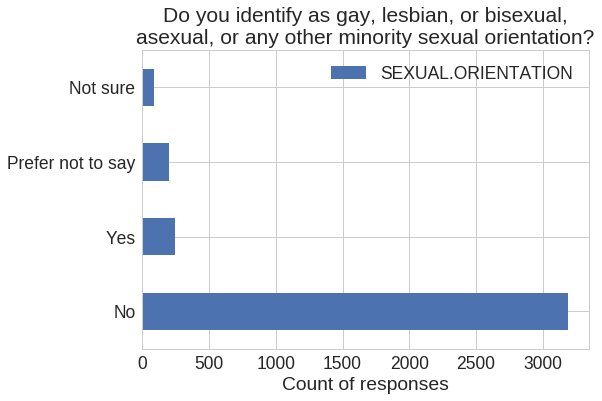

In [137]:
ax = pd.DataFrame(survey_df['SEXUAL.ORIENTATION'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("Do you identify as gay, lesbian, or bisexual,\nasexual, or any other minority sexual orientation?")

### How well can you read and write in English?

In [138]:
pd.DataFrame(survey_df['WRITTEN.ENGLISH'].value_counts())

,WRITTEN.ENGLISH
Very well,2865
Moderately well,742
Not very well,108
Not at all,6


In [139]:
prop_df = pd.DataFrame((survey_df['WRITTEN.ENGLISH'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Very well,76.995431
Moderately well,19.940876
Not very well,2.902446
Not at all,0.161247


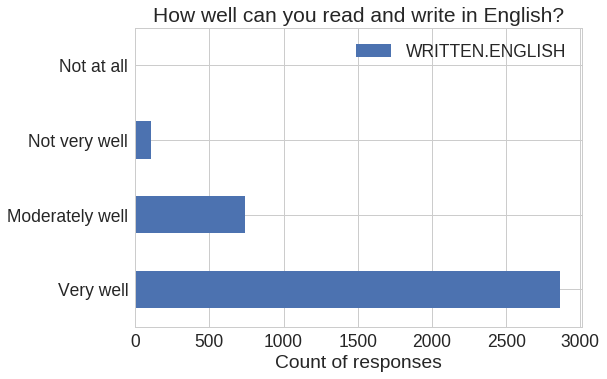

In [140]:
ax = pd.DataFrame(survey_df['WRITTEN.ENGLISH'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("How well can you read and write in English?")

### What is your age?

In [141]:
pd.DataFrame(survey_df['AGE'].value_counts().sort_index())

,AGE
17 or younger,139
18 to 24 years,871
25 to 34 years,1400
35 to 44 years,772
45 to 54 years,267
55 to 64 years,93
65 years or older,36


In [142]:
prop_df = pd.DataFrame((survey_df['AGE'].value_counts(normalize=True)*100).sort_index())
prop_df.columns=["percent"]
prop_df

,percent
17 or younger,3.884852
18 to 24 years,24.343208
25 to 34 years,39.128004
35 to 44 years,21.576300
45 to 54 years,7.462269
55 to 64 years,2.599217
65 years or older,1.006149


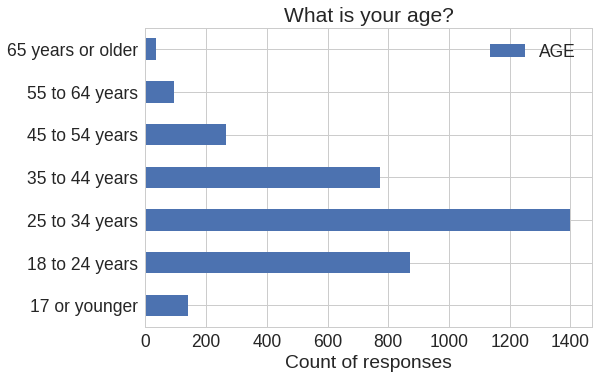

In [143]:
ax = pd.DataFrame(survey_df['AGE'].value_counts().sort_index()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("What is your age?")

### What is highest level of formal education that you have completed?

In [144]:
pd.DataFrame(survey_df['FORMAL.EDUCATION'].value_counts())

,FORMAL.EDUCATION
Bachelor's degree,1321
Master's degree,852
"Some college, no degree",640
Secondary (high) school graduate or equivalent,375
"Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)",256
Vocational/trade program or apprenticeship,127
Less than secondary (high) school,126


In [145]:
prop_df = pd.DataFrame((survey_df['FORMAL.EDUCATION'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Bachelor's degree,35.731674
Master's degree,23.045713
"Some college, no degree",17.311334
Secondary (high) school graduate or equivalent,10.143359
"Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)",6.924533
Vocational/trade program or apprenticeship,3.435218
Less than secondary (high) school,3.408169


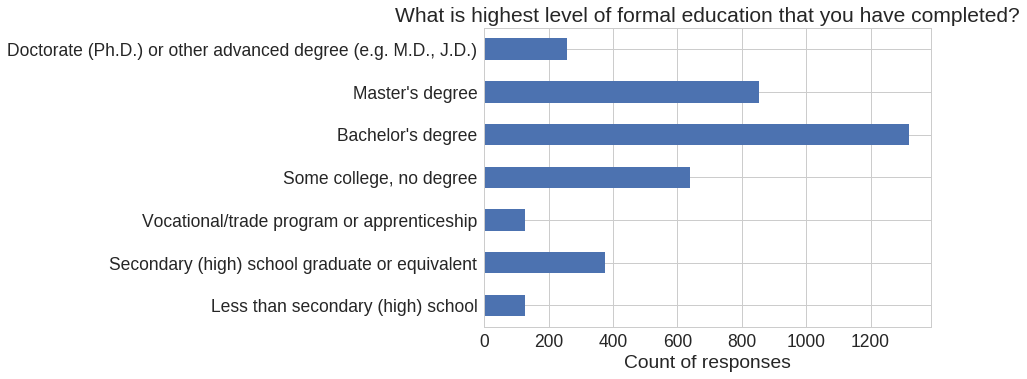

In [146]:
order = ["Less than secondary (high) school",
         "Secondary (high) school graduate or equivalent",
         "Vocational/trade program or apprenticeship",
         "Some college, no degree",
         "Bachelor's degree",
         "Master's degree",
         "Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)"]

edu_counts_df = survey_df['FORMAL.EDUCATION'].value_counts()[order]

ax = edu_counts_df.plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("What is highest level of formal education that you have completed?")

### What is the highest level of formal education that either of your parents completed?

In [147]:
pd.DataFrame(survey_df['PARENTS.FORMAL.EDUCATION'].value_counts())

,PARENTS.FORMAL.EDUCATION
Bachelor's degree,961
Master's degree,871
Secondary (high) school graduate or equivalent,566
"Some college, no degree",388
"Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)",387
Vocational/trade program or apprenticeship,257
Less than secondary (high) school,243


In [148]:
prop_df = pd.DataFrame((survey_df['PARENTS.FORMAL.EDUCATION'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Bachelor's degree,26.163899
Master's degree,23.713586
Secondary (high) school graduate or equivalent,15.409747
"Some college, no degree",10.563572
"Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)",10.536346
Vocational/trade program or apprenticeship,6.997005
Less than secondary (high) school,6.615845


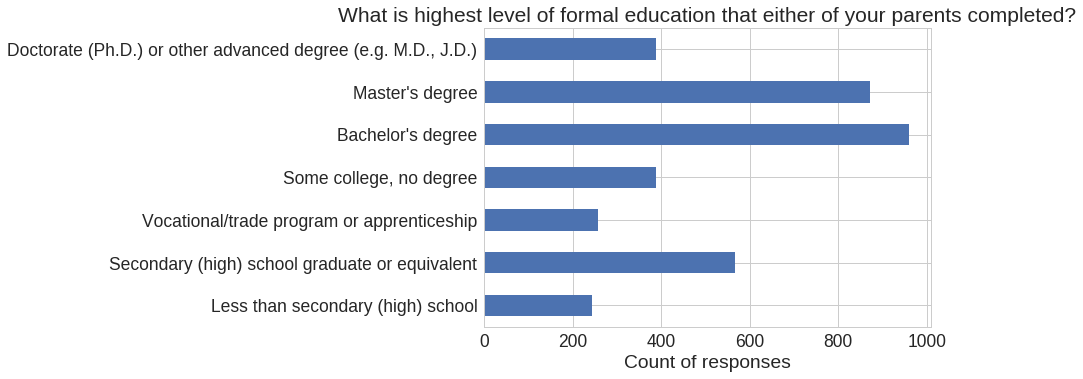

In [149]:
order = ["Less than secondary (high) school",
         "Secondary (high) school graduate or equivalent",
         "Vocational/trade program or apprenticeship",
         "Some college, no degree",
         "Bachelor's degree",
         "Master's degree",
         "Doctorate (Ph.D.) or other advanced degree (e.g. M.D., J.D.)"]

edu_counts_df = survey_df['PARENTS.FORMAL.EDUCATION'].value_counts()[order]

ax = edu_counts_df.plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("What is highest level of formal education that either of your parents completed?")

### How old were you when you first had regular access to a computer with an internet connection?

In [150]:
pd.DataFrame(survey_df['AGE.AT.FIRST.COMPUTER.INTERNET'].value_counts())

,AGE.AT.FIRST.COMPUTER.INTERNET
Younger than 13 years old,1478
13 - 17 years old,1313
18 - 24 years old,695
25 - 45 years old,202
Older than 45 years old,23


In [151]:
prop_df = pd.DataFrame((survey_df['AGE.AT.FIRST.COMPUTER.INTERNET'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
Younger than 13 years old,39.827540
13 - 17 years old,35.381299
18 - 24 years old,18.728106
25 - 45 years old,5.443277
Older than 45 years old,0.619779


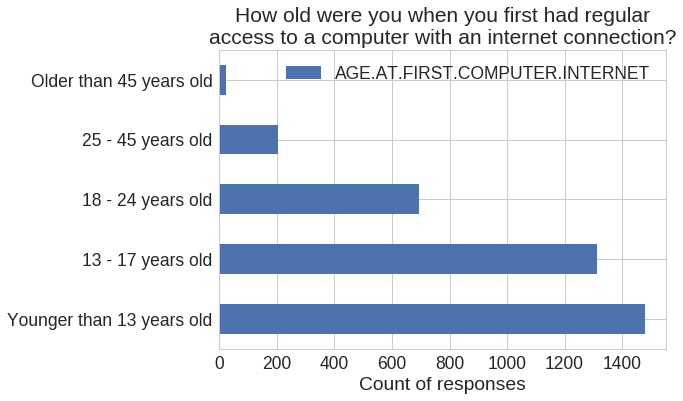

In [152]:
ax = pd.DataFrame(survey_df['AGE.AT.FIRST.COMPUTER.INTERNET'].value_counts()).plot(kind='barh')
ax.set_xlabel("Count of responses")
plt.title("How old were you when you first had regular\naccess to a computer with an internet connection?")

### Where did you first have regular access to a computer with internet connection?

In [153]:
pd.DataFrame(survey_df['LOCATION.OF.FIRST.COMPUTER.INTERNET'].value_counts())

,LOCATION.OF.FIRST.COMPUTER.INTERNET
At home (belonging to me or a family member),2520
"In a classroom, computer lab, or library at school",746
At an internet cafe or similar space,182
Other (please describe),106
At a public library or community center,87
At work (recoded from open ended),70


In [154]:
prop_df = pd.DataFrame((survey_df['LOCATION.OF.FIRST.COMPUTER.INTERNET'].value_counts(normalize=True)*100))
prop_df.columns=["percent"]
prop_df

,percent
At home (belonging to me or a family member),67.906225
"In a classroom, computer lab, or library at school",20.102398
At an internet cafe or similar space,4.904338
Other (please describe),2.856373
At a public library or community center,2.344382
At work (recoded from open ended),1.886284


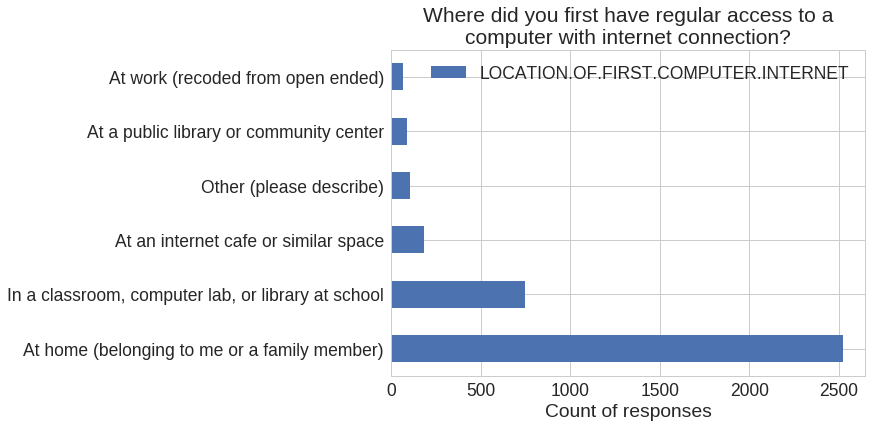

In [155]:
ax = pd.DataFrame(survey_df['LOCATION.OF.FIRST.COMPUTER.INTERNET'].value_counts()).plot(kind='barh', figsize=[8.5,6])
ax.set_xlabel("Count of responses")
plt.title("Where did you first have regular access to a\ncomputer with internet connection?")

## Harassment / Inclusiveness of OSS

### Have you ever observed any of the following in the context of an open source project?



In [156]:
discouraging_responses = survey_df[discouraging_vars].apply(pd.Series.value_counts).transpose()[["Yes", "No"]]
discouraging_responses

,Yes,No
DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE,3017,792
DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION,1210,2580
DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE,2195,1598
DISCOURAGING.BEHAVIOR.BAD.DOCS,3559,263
DISCOURAGING.BEHAVIOR.CONFLICT,1830,1966
DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE,649,3158


In [157]:
discouraging_percent = pd.DataFrame(discouraging_responses["Yes"] / discouraging_responses.sum(axis=1) * 100, columns=["percent_yes"]).sort_values(by="percent_yes")
discouraging_percent

,percent_yes
DISCOURAGING.BEHAVIOR.UNWELCOMING.LANGUAGE,17.047544
DISCOURAGING.BEHAVIOR.REJECTION.WOUT.EXPLANATION,31.926121
DISCOURAGING.BEHAVIOR.CONFLICT,48.208641
DISCOURAGING.BEHAVIOR.DISMISSIVE.RESPONSE,57.869760
DISCOURAGING.BEHAVIOR.LACK.OF.RESPONSE,79.207141
DISCOURAGING.BEHAVIOR.BAD.DOCS,93.118786


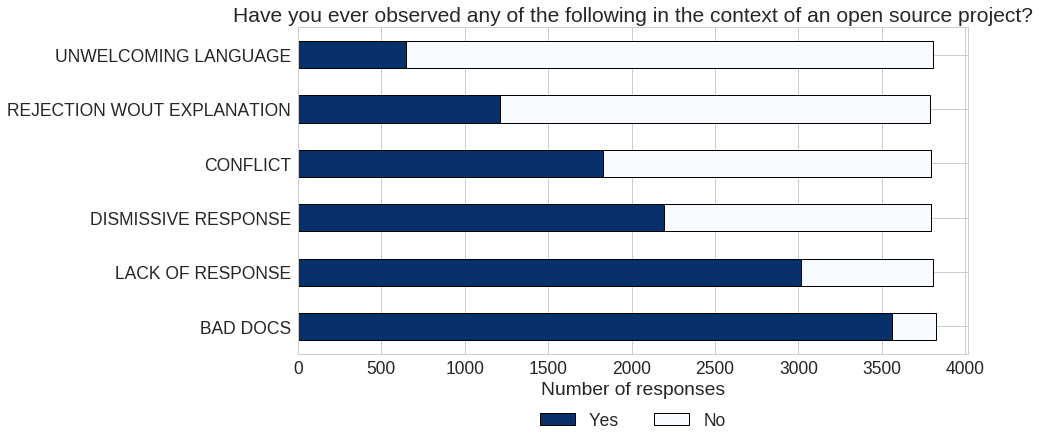

In [158]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues_r
discouraging_responses.sort_values(by="No").plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[22:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("Have you ever observed any of the following in the context of an open source project?")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### Have you ever witnessed any of the following behaviors directed at another person in the context of an open source project? (not including something directed at you)

In [159]:
neg_witness_responses = neg_df[neg_witness_vars].apply(pd.Series.value_counts).transpose()[[1,0]]
neg_witness_responses.columns = ["Yes", "No"]
neg_witness_responses

,Yes,No
NEGATIVE.WITNESS.RUDENESS,1753,4276
NEGATIVE.WITNESS.NAME.CALLING,789,5240
NEGATIVE.WITNESS.THREATS,162,5867
NEGATIVE.WITNESS.IMPERSONATION,177,5852
NEGATIVE.WITNESS.SUSTAINED.HARASSMENT,237,5792
NEGATIVE.WITNESS.CROSS.PLATFORM.HARASSMENT,175,5854
NEGATIVE.WITNESS.STALKING,108,5921
NEGATIVE.WITNESS.SEXUAL.ADVANCES,136,5893
NEGATIVE.WITNESS.STEREOTYPING,423,5606
NEGATIVE.WITNESS.DOXXING,151,5878


Only 3,664 respondents clicked any boxes in this question, meaning 2,365 did not click the "none of the above".

In [160]:
neg_witness_responses_adj = neg_witness_responses
neg_witness_responses_adj["No"] = neg_witness_responses_adj["No"] - 2365
neg_witness_responses_adj_df = pd.DataFrame(neg_witness_responses_adj["Yes"] / (neg_witness_responses_adj["Yes"] + neg_witness_responses_adj["No"]) * 100, columns=["percent_yes"])

In [161]:
neg_witness_responses_adj[:-1]

,Yes,No
NEGATIVE.WITNESS.RUDENESS,1753,1911
NEGATIVE.WITNESS.NAME.CALLING,789,2875
NEGATIVE.WITNESS.THREATS,162,3502
NEGATIVE.WITNESS.IMPERSONATION,177,3487
NEGATIVE.WITNESS.SUSTAINED.HARASSMENT,237,3427
NEGATIVE.WITNESS.CROSS.PLATFORM.HARASSMENT,175,3489
NEGATIVE.WITNESS.STALKING,108,3556
NEGATIVE.WITNESS.SEXUAL.ADVANCES,136,3528
NEGATIVE.WITNESS.STEREOTYPING,423,3241
NEGATIVE.WITNESS.DOXXING,151,3513


In [162]:
neg_witness_responses_adj_df.sort_values(by="percent_yes")

,percent_yes
NEGATIVE.WITNESS.OTHER,2.128821
NEGATIVE.WITNESS.STALKING,2.947598
NEGATIVE.WITNESS.SEXUAL.ADVANCES,3.711790
NEGATIVE.WITNESS.DOXXING,4.121179
NEGATIVE.WITNESS.THREATS,4.421397
NEGATIVE.WITNESS.CROSS.PLATFORM.HARASSMENT,4.776201
NEGATIVE.WITNESS.IMPERSONATION,4.830786
NEGATIVE.WITNESS.SUSTAINED.HARASSMENT,6.468341
NEGATIVE.WITNESS.STEREOTYPING,11.544760
NEGATIVE.WITNESS.NAME.CALLING,21.533843


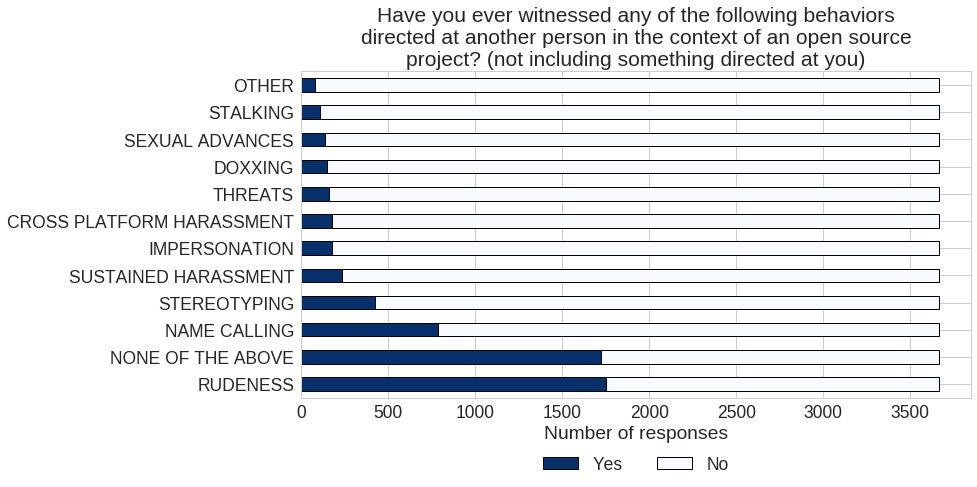

In [163]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues_r
neg_witness_responses_adj[:-1].sort_values(by='No').plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[17:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("Have you ever witnessed any of the following behaviors\ndirected at another person in the context of an open source\nproject? (not including something directed at you)")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### Have you ever experienced any of the following behaviors directed at you in the context of an open source project?

In [164]:
neg_exp_responses = neg_df[neg_exp_vars].apply(pd.Series.value_counts).transpose()[[1,0]]
neg_exp_responses.columns = ["Yes", "No"]
neg_exp_responses

,Yes,No
NEGATIVE.EXPERIENCE.RUDENESS,646,5383
NEGATIVE.EXPERIENCE.NAME.CALLING,192,5837
NEGATIVE.EXPERIENCE.THREATS,43,5986
NEGATIVE.EXPERIENCE.IMPERSONATION,45,5984
NEGATIVE.EXPERIENCE.SUSTAINED.HARASSMENT,55,5974
NEGATIVE.EXPERIENCE.CROSS.PLATFORM.HARASSMENT,42,5987
NEGATIVE.EXPERIENCE.STALKING,35,5994
NEGATIVE.EXPERIENCE.SEXUAL.ADVANCES,25,6004
NEGATIVE.EXPERIENCE.STEREOTYPING,114,5915
NEGATIVE.EXPERIENCE.DOXXING,23,6006


Only 3,638 respondents clicked any boxes in this question, meaning 2,391 did not click the "none of the above".

In [165]:
neg_exp_responses_adj = neg_exp_responses
neg_exp_responses_adj["No"] = neg_exp_responses_adj["No"] - 2391
neg_exp_responses_adj_df = pd.DataFrame(neg_exp_responses["Yes"] / (neg_exp_responses_adj["Yes"] + neg_exp_responses_adj["No"]) * 100, columns=["percent_yes"])

In [166]:
neg_exp_responses_adj[:-1]

,Yes,No
NEGATIVE.EXPERIENCE.RUDENESS,646,2992
NEGATIVE.EXPERIENCE.NAME.CALLING,192,3446
NEGATIVE.EXPERIENCE.THREATS,43,3595
NEGATIVE.EXPERIENCE.IMPERSONATION,45,3593
NEGATIVE.EXPERIENCE.SUSTAINED.HARASSMENT,55,3583
NEGATIVE.EXPERIENCE.CROSS.PLATFORM.HARASSMENT,42,3596
NEGATIVE.EXPERIENCE.STALKING,35,3603
NEGATIVE.EXPERIENCE.SEXUAL.ADVANCES,25,3613
NEGATIVE.EXPERIENCE.STEREOTYPING,114,3524
NEGATIVE.EXPERIENCE.DOXXING,23,3615


In [167]:
neg_exp_responses_adj_df.sort_values(by="percent_yes")

,percent_yes
NEGATIVE.EXPERIENCE.DOXXING,0.632216
NEGATIVE.EXPERIENCE.SEXUAL.ADVANCES,0.687191
NEGATIVE.EXPERIENCE.STALKING,0.962067
NEGATIVE.EXPERIENCE.OTHER,1.072018
NEGATIVE.EXPERIENCE.CROSS.PLATFORM.HARASSMENT,1.154480
NEGATIVE.EXPERIENCE.THREATS,1.181968
NEGATIVE.EXPERIENCE.IMPERSONATION,1.236943
NEGATIVE.EXPERIENCE.SUSTAINED.HARASSMENT,1.511820
NEGATIVE.EXPERIENCE.STEREOTYPING,3.133590
NEGATIVE.EXPERIENCE.NAME.CALLING,5.277625


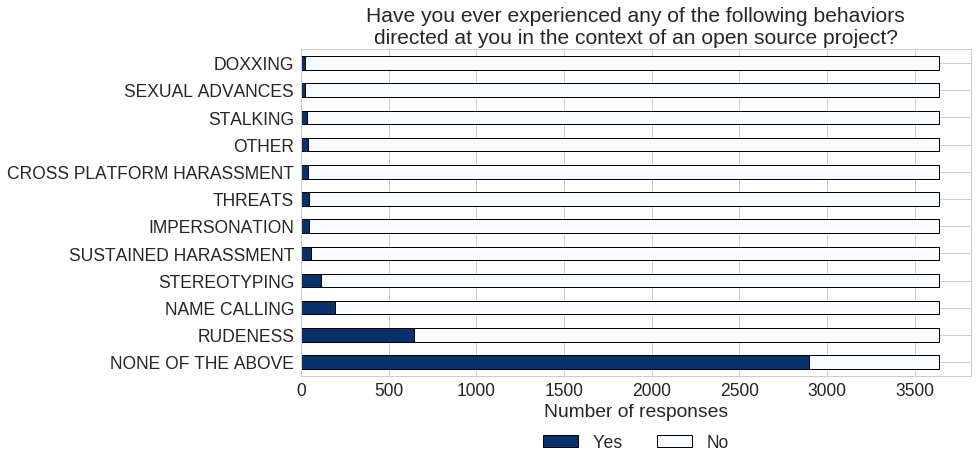

In [168]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues_r
neg_exp_responses_adj[:-1].sort_values(by='No').plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[20:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("Have you ever experienced any of the following behaviors\ndirected at you in the context of an open source project?")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### Thinking of the last time you experienced harassment, how did you respond? 

Choose all that apply.


In [169]:
neg_resp_responses = neg_df[neg_resp_vars].apply(pd.Series.value_counts).transpose()[[1,0]]
neg_resp_responses.columns = ["Yes", "No"]
neg_resp_responses

,Yes,No
NEGATIVE.RESPONSE.ASKED.USER.TO.STOP,194,5835
NEGATIVE.RESPONSE.SOLICITED.COMMUNITY.SUPPORT,112,5917
NEGATIVE.RESPONSE.BLOCKED.USER,170,5859
NEGATIVE.RESPONSE.REPORTED.TO.MAINTAINERS,95,5934
NEGATIVE.RESPONSE.REPORTED.TO.HOST.OR.ISP,20,6009
NEGATIVE.RESPONSE.CONSULTED.LEGAL.COUNSEL,8,6021
NEGATIVE.RESPONSE.CONTACTED.LAW.ENFORCEMENT,9,6020
NEGATIVE.RESPONSE.OTHER,71,5958
NEGATIVE.RESPONSE.IGNORED,350,5679
NEGATIVE.RESPONSE.ANY.RESPONSE,719,5310


Only 719 respondents clicked any boxes in this question, meaning 5,310 did not click on "I did not react / ignored the incident".

In [170]:
neg_resp_responses_adj = neg_resp_responses
neg_resp_responses_adj["No"] = neg_resp_responses_adj["No"] - 5310
neg_resp_responses_adj_df = pd.DataFrame(neg_resp_responses_adj["Yes"] / (neg_resp_responses_adj["Yes"] + neg_resp_responses_adj["No"]) * 100, columns=["percent_yes"])

In [171]:
neg_resp_responses_adj[:-1]

,Yes,No
NEGATIVE.RESPONSE.ASKED.USER.TO.STOP,194,525
NEGATIVE.RESPONSE.SOLICITED.COMMUNITY.SUPPORT,112,607
NEGATIVE.RESPONSE.BLOCKED.USER,170,549
NEGATIVE.RESPONSE.REPORTED.TO.MAINTAINERS,95,624
NEGATIVE.RESPONSE.REPORTED.TO.HOST.OR.ISP,20,699
NEGATIVE.RESPONSE.CONSULTED.LEGAL.COUNSEL,8,711
NEGATIVE.RESPONSE.CONTACTED.LAW.ENFORCEMENT,9,710
NEGATIVE.RESPONSE.OTHER,71,648
NEGATIVE.RESPONSE.IGNORED,350,369


In [172]:
neg_resp_responses_adj_df.sort_values(by="percent_yes")

,percent_yes
NEGATIVE.RESPONSE.CONSULTED.LEGAL.COUNSEL,1.112656
NEGATIVE.RESPONSE.CONTACTED.LAW.ENFORCEMENT,1.251739
NEGATIVE.RESPONSE.REPORTED.TO.HOST.OR.ISP,2.781641
NEGATIVE.RESPONSE.OTHER,9.874826
NEGATIVE.RESPONSE.REPORTED.TO.MAINTAINERS,13.212796
NEGATIVE.RESPONSE.SOLICITED.COMMUNITY.SUPPORT,15.577191
NEGATIVE.RESPONSE.BLOCKED.USER,23.643950
NEGATIVE.RESPONSE.ASKED.USER.TO.STOP,26.981919
NEGATIVE.RESPONSE.IGNORED,48.678720
NEGATIVE.RESPONSE.ANY.RESPONSE,100.000000


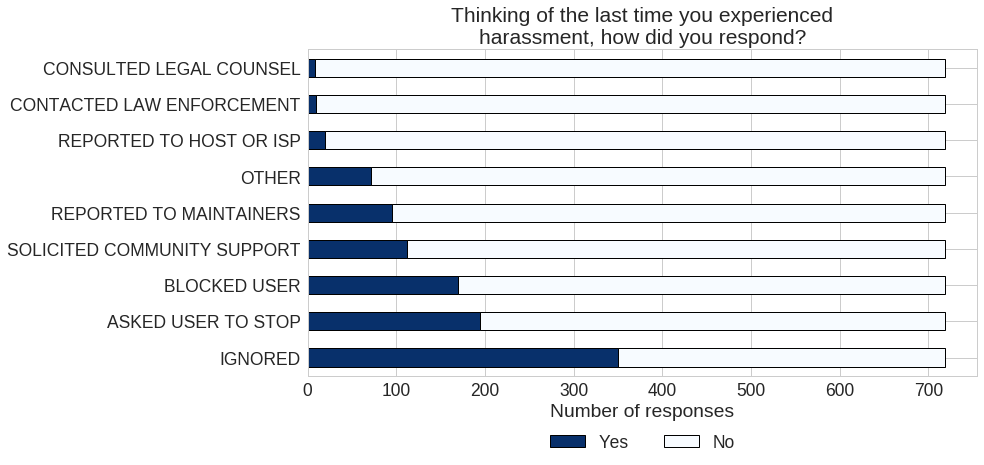

In [173]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues_r
neg_resp_responses_adj[:-1].sort_values(by='No').plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[18:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("Thinking of the last time you experienced\nharassment, how did you respond?")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### How effective were the following responses?

In [174]:
neg_effect_responses = neg_df[neg_effect_vars].apply(pd.Series.value_counts).transpose()
neg_effect_responses = neg_effect_responses.replace(np.nan, 0).sort_values(by="Mostly effective")
neg_effect_responses = neg_effect_responses[["Not at all effective", "A little effective", "Somewhat effective", "Mostly effective", "Completely effective"]]
neg_effect_responses

,Not at all effective,A little effective,Somewhat effective,Mostly effective,Completely effective
RESPONSE.EFFECTIVENESS.CONTACTED.LAW.ENFORCEMENT,4.0,0.0,2.0,0.0,3.0
RESPONSE.EFFECTIVENESS.CONSULTED.LEGAL.COUNSEL,1.0,1.0,3.0,2.0,1.0
RESPONSE.EFFECTIVENESS.REPORTED.TO.HOST.OR.ISP,6.0,4.0,6.0,3.0,1.0
RESPONSE.EFFECTIVENESS.OTHER,4.0,0.0,4.0,10.0,11.0
RESPONSE.EFFECTIVENESS.REPORTED.TO.MAINTAINERS,10.0,11.0,31.0,30.0,13.0
RESPONSE.EFFECTIVENESS.SOLICITED.COMMUNITY.SUPPORT,6.0,22.0,38.0,32.0,14.0
RESPONSE.EFFECTIVENESS.ASKED.USER.TO.STOP,48.0,51.0,50.0,33.0,11.0
RESPONSE.EFFECTIVENESS.BLOCKED.USER,6.0,20.0,28.0,56.0,58.0


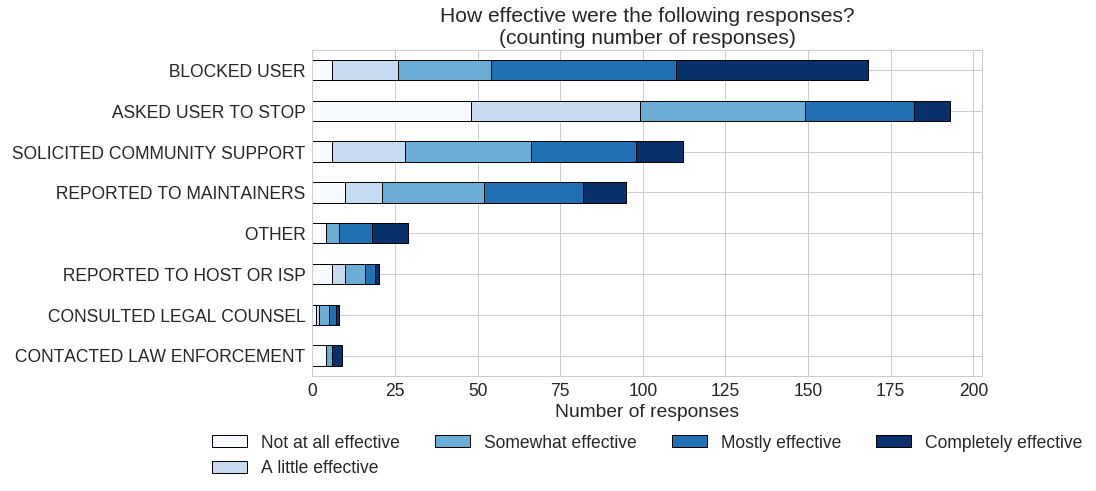

In [175]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues
neg_effect_responses.plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[22:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("How effective were the following responses?\n(counting number of responses)")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



In [176]:
neg_effect_responses_prop = neg_df[neg_effect_vars].apply(pd.Series.value_counts, normalize=True).transpose()
neg_effect_responses_prop = neg_effect_responses_prop.replace(np.nan, 0).sort_values(by="Completely effective")
neg_effect_responses_prop = neg_effect_responses_prop[["Not at all effective", "A little effective", "Somewhat effective", "Mostly effective", "Completely effective"]]
neg_effect_responses_prop = neg_effect_responses_prop * 100
neg_effect_responses_prop

,Not at all effective,A little effective,Somewhat effective,Mostly effective,Completely effective
RESPONSE.EFFECTIVENESS.REPORTED.TO.HOST.OR.ISP,30.000000,20.000000,30.000000,15.000000,5.000000
RESPONSE.EFFECTIVENESS.ASKED.USER.TO.STOP,24.870466,26.424870,25.906736,17.098446,5.699482
RESPONSE.EFFECTIVENESS.SOLICITED.COMMUNITY.SUPPORT,5.357143,19.642857,33.928571,28.571429,12.500000
RESPONSE.EFFECTIVENESS.CONSULTED.LEGAL.COUNSEL,12.500000,12.500000,37.500000,25.000000,12.500000
RESPONSE.EFFECTIVENESS.REPORTED.TO.MAINTAINERS,10.526316,11.578947,32.631579,31.578947,13.684211
RESPONSE.EFFECTIVENESS.CONTACTED.LAW.ENFORCEMENT,44.444444,0.000000,22.222222,0.000000,33.333333
RESPONSE.EFFECTIVENESS.BLOCKED.USER,3.571429,11.904762,16.666667,33.333333,34.523810
RESPONSE.EFFECTIVENESS.OTHER,13.793103,0.000000,13.793103,34.482759,37.931034


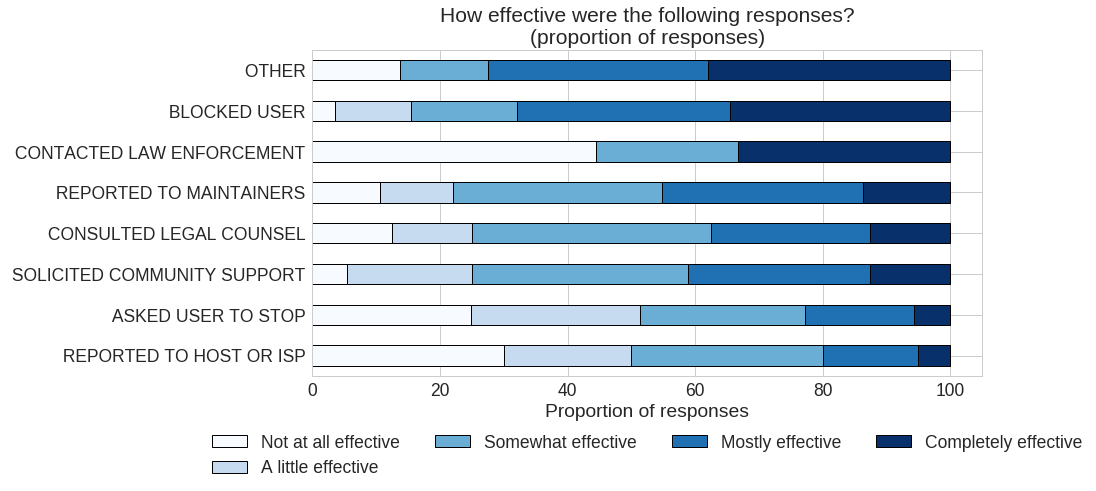

In [177]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues
neg_effect_responses_prop.plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[22:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("How effective were the following responses?\n(proportion of responses)")

plt.xlabel("Proportion of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')



### As a result of experiencing or witnessing harassment, which, if any, of the following have you done?

In [178]:
neg_conseq_responses = neg_df[neg_conseq_vars].apply(pd.Series.value_counts).transpose()[[1,0]]
neg_conseq_responses.columns = ["Yes", "No"]
neg_conseq_responses

,Yes,No
NEGATIVE.CONSEQUENCES.STOPPED.CONTRIBUTING,390,5639
NEGATIVE.CONSEQUENCES.PSEUDONYM,50,5979
NEGATIVE.CONSEQUENCES.WORK.IN.PRIVATE,166,5863
NEGATIVE.CONSEQUENCES.CHANGE.USERNAME,48,5981
NEGATIVE.CONSEQUENCES.CHANGE.ONLINE.PRESENCE,79,5950
NEGATIVE.CONSEQUENCES.SUGGEST.COC,116,5913
NEGATIVE.CONSEQUENCES.PRIVATE.COMMUNITY.DISCUSSION,301,5728
NEGATIVE.CONSEQUENCES.PUBLIC.COMMUNITY.DISCUSSION,248,5781
NEGATIVE.CONSEQUENCES.OFFLINE.CHANGES,85,5944
NEGATIVE.CONSEQUENCES.OTHER,90,5939


Only 1,953 respondents clicked any boxes in this question, meaning 4,076 did not click a response or the "none of the above".

In [179]:
neg_conseq_responses_adj = neg_conseq_responses
neg_conseq_responses_adj["No"] = neg_conseq_responses_adj["No"] - 4076
neg_conseq_responses_adj_df = pd.DataFrame(neg_conseq_responses_adj["Yes"] / (neg_conseq_responses_adj["Yes"] + neg_conseq_responses_adj["No"]) * 100, columns=["percent_yes"])

In [180]:
neg_conseq_responses_adj[:-1]

,Yes,No
NEGATIVE.CONSEQUENCES.STOPPED.CONTRIBUTING,390,1563
NEGATIVE.CONSEQUENCES.PSEUDONYM,50,1903
NEGATIVE.CONSEQUENCES.WORK.IN.PRIVATE,166,1787
NEGATIVE.CONSEQUENCES.CHANGE.USERNAME,48,1905
NEGATIVE.CONSEQUENCES.CHANGE.ONLINE.PRESENCE,79,1874
NEGATIVE.CONSEQUENCES.SUGGEST.COC,116,1837
NEGATIVE.CONSEQUENCES.PRIVATE.COMMUNITY.DISCUSSION,301,1652
NEGATIVE.CONSEQUENCES.PUBLIC.COMMUNITY.DISCUSSION,248,1705
NEGATIVE.CONSEQUENCES.OFFLINE.CHANGES,85,1868
NEGATIVE.CONSEQUENCES.OTHER,90,1863


In [181]:
neg_conseq_responses_adj_df.sort_values(by="percent_yes")

,percent_yes
NEGATIVE.CONSEQUENCES.CHANGE.USERNAME,2.457757
NEGATIVE.CONSEQUENCES.PSEUDONYM,2.560164
NEGATIVE.CONSEQUENCES.CHANGE.ONLINE.PRESENCE,4.045059
NEGATIVE.CONSEQUENCES.OFFLINE.CHANGES,4.352279
NEGATIVE.CONSEQUENCES.OTHER,4.608295
NEGATIVE.CONSEQUENCES.SUGGEST.COC,5.939580
NEGATIVE.CONSEQUENCES.WORK.IN.PRIVATE,8.499744
NEGATIVE.CONSEQUENCES.PUBLIC.COMMUNITY.DISCUSSION,12.698413
NEGATIVE.CONSEQUENCES.PRIVATE.COMMUNITY.DISCUSSION,15.412186
NEGATIVE.CONSEQUENCES.STOPPED.CONTRIBUTING,19.969278


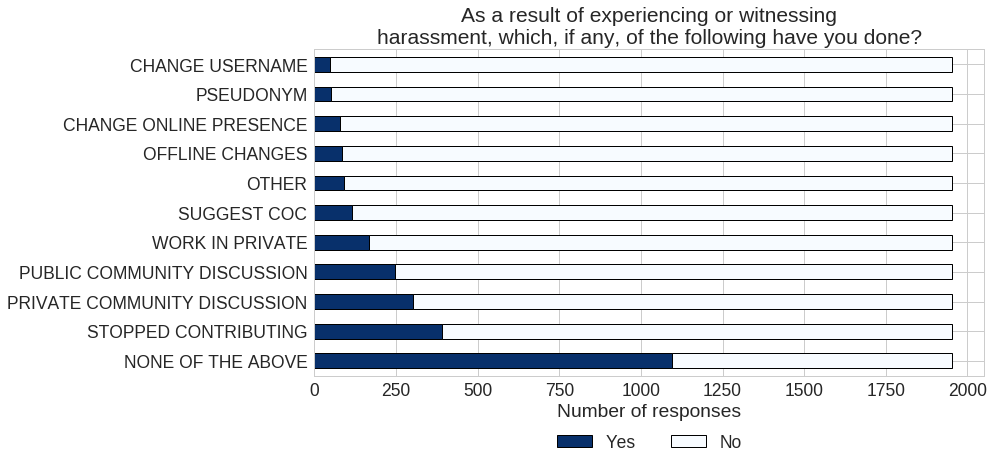

In [182]:
sns.set(style="whitegrid", font_scale=1.75)
fig, ax = plt.subplots()
cmap=matplotlib.cm.Blues_r
neg_conseq_responses_adj[:-1].sort_values(by='No').plot.barh(stacked=True, ax=ax, figsize=[12,6], cmap=cmap, edgecolor='black', linewidth=1)

labels = []
for l in ax.get_yticklabels():
    title_text = l.get_text()[22:].replace(".", " ") # cut off "CONTRIBUTOR.TYPE"
        
    labels.append(title_text)
    
ax.set_yticklabels(labels)


plt.title("As a result of experiencing or witnessing\nharassment, which, if any, of the following have you done?")

plt.xlabel("Number of responses")



legend = plt.legend(fancybox=True, loc='upper center', bbox_to_anchor=(.5, -.13), ncol=4, shadow=True)
legend.get_frame().set_edgecolor('b')
legend.get_frame().set_facecolor('white')

